# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

## 1.2 Read Data

In [2]:
# file_path= './data/NCDC/jerez/dat.txt' # time shift
# file_path= './data/NCDC/almeria/dat.txt'

# Greece
# file_path= './data/NCDC/eleftherios_intl/dat.txt'
# file_path= './data/NCDC/elefsis/dat.txt' # bad dataset
# file_path= './data/NCDC/malaga/dat.txt'
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# Turkey
# file_path= './data/NCDC/turkey/konya/dat.txt' 
# file_path= './data/NCDC/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/turkey/bartin/dat.txt' # bad dataset

# Iran
# file_path= './data/NCDC/iran/chahbahar/dat.txt'
# file_path= './data/NCDC/iran/zabol/dat.txt' # Problematic data
# file_path= './data/NCDC/iran/torbat_heydarieh/dat.txt' # Unusable

# UAE
# file_path= './data/NCDC/al_maktoum/dat.txt' 
# file_path= './data/NCDC/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/buraimi/dat.txt' # not good dataset

# file_path= './data/NCDC/uk/marham/dat.txt' 
# file_path= './data/NCDC/uk/tiree/dat.txt'  # try 4
# file_path= './data/NCDC/uk/boscombe_down/dat.txt' # 4?, numpy bug
# file_path= './data/NCDC/uk/middle_wallop/dat.txt' 
# file_path= './data/NCDC/uk/southhamption/dat.txt' # high 0, trend
# file_path= './data/NCDC/uk/bournemouth/dat.txt' # 4?
# file_path= "./data/NCDC/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?

# file_path, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/landsberg_lech/dat.txt", 4 # very good, can try 4
file_path= './data/NCDC/europe/pau_pyrenees/dat.txt' # unit shift, 2; force using knot 
# file_path= "./data/NCDC/europe/vatry/dat.txt"  # double peak, initial speed (should be good with m/s), mixed report type
# file_path= "./data/NCDC/europe/neuburg/dat.txt"
# file_path= "./data/NCDC/europe/valladolid/dat.txt"
# file_path= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; very good, trend
# file_path= "./data/NCDC/europe/avord/dat.txt" # try 4, initial speed (should be good with m/s)
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# file_path= "./data/NCDC/europe/holzdorf/dat.txt" # 2008 year
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= "./data/NCDC/europe/barayas/dat.txt" # numpy problem
# file_path= './data/NCDC/europe/tenerife_sur/dat.txt'  # some directions are blocked
# file_path= './data/NCDC/europe/nantes/dat.txt' # some dir R square / K-S differs big, unit detect fails

# file_path= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" # care for the sampling time
# file_path= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# file_path= "./data/NCDC/cn/hefei_luogang/dat.txt" # few 0, trend, try 2
# file_path= "./data/NCDC/cn/nanjing_lukou/dat.txt" 
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path= "./data/NCDC/oceania/auckland_intl/dat.txt"  # Good data, Weird KDE shape, might be blocked?
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path= "./data/NCDC/oceania/canberra/dat.txt" # high 0, numpy problem

# file_path= './data/NCDC/us/boston_16nm/dat.txt' # Offshore

# file_path = './data/asos/denver/hr_avg.csv'
# file_path = './data/asos/bismarck_ND/hr_avg.csv' # try 4
# file_path = './data/asos/aberdeen_SD/hr_avg.csv' # only to 2012, good fit, try 2
# file_path = './data/asos/minneapolis/hr_avg.csv'
# file_path = './data/asos/lincoln_NE/hr_avg.csv' 
# file_path = './data/asos/des_moines_IA/hr_avg.csv'
# file_path = './data/asos/springfield_IL/hr_avg.csv' # good fit
# file_path = './data/asos/topeka/hr_avg.csv' # High 0

# file_path = './data/NDAWN/baker/hr_avg.csv' # 4 might be better
# file_path = './data/NDAWN/dickinson/hr_avg.csv'
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

In [3]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
    df.dropna(subset=['dir','speed'], inplace=True)
    integer_data = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    integer_data = False
    knot_unit = False
else:
    # ASOS
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    integer_data = False
    knot_unit = True

In [4]:
df

date  HrMn   type  dir  speed wind_type
0       19790101  0000  FM-12  260    6.2         N
1       19790101  0100  FM-15  260    5.1         N
2       19790101  0200  FM-15  260    7.2         N
3       19790101  0300  FM-12  260   10.3         N
4       19790101  0600  FM-12  280   10.3         N
5       19790101  0700  FM-15  280    7.2         N
6       19790101  0800  FM-15  280    6.1         N
7       19790101  0900  FM-12  360    5.1         N
8       19790101  1000  FM-15  360    3.6         N
9       19790101  1100  FM-15   60    1.0         N
10      19790101  1200  FM-12  999    0.0         C
11      19790101  1300  FM-15   20    1.0         N
12      19790101  1400  FM-15  999    0.0         C
13      19790101  1500  FM-12  180    1.0         N
14      19790101  1600  FM-15  999    0.0         C
15      19790101  1700  FM-15  140    2.0         N
16      19790101  1800  FM-12  140    2.6         N
17      19790101  1900  FM-15  120    2.0         N
18      19790101  2000  FM-15  140    1.5         N
19      19790101  2100  FM-12   80    1.0         N
20      19790102  0100  FM-15   60    3.6         N
21      19790102  0200  FM-15   40    4.1         N
22      19790102  0300  FM-12   40    4.1         N
23      19790102  0500  FM-15   60    2.5         N
24      19790102  0600  FM-12  100    2.6         N
25      19790102  0800  FM-15   80    2.5         N
26      19790102  0900  FM-12   60    3.1         N
27      19790102  1000  FM-15   80    5.1         N
28      19790102  1200  FM-12   80    3.1         N
29      19790102  1300  FM-15   80    4.1         N
...          ...   ...    ...  ...    ...       ...
366609  20170401  0900  FM-15  310    4.1         N
366610  20170401  0930  FM-15  999    1.5         V
366611  20170401  1000  FM-15  230    3.6         V
366612  20170401  1030  FM-15  260    6.7         V
366613  20170401  1100  FM-12  270    6.7         N
366614  20170401  1130  FM-15  260    6.2         N
366615  20170401  1200  FM-15  260    4.1         N
366616  20170401  1230  FM-15  250    5.7         V
366617  20170401  1300  FM-15  270    8.2         V
366618  20170401  1330  FM-15  280    9.3         N
366619  20170401  1400  FM-15  270    8.2         N
366620  20170401  1430  FM-15  250    7.7         N
366621  20170401  1500  FM-15  250    5.1         V
366622  20170401  1530  FM-15  230    4.1         V
366623  20170401  1600  FM-15  220    3.6         V
366624  20170401  1630  FM-15  230    4.1         V
366625  20170401  1700  FM-15  270    6.2         N
366626  20170401  1730  FM-15  250    6.2         N
366627  20170401  1800  FM-15  250    5.1         N
366628  20170401  1830  FM-15  270    5.1         N
366629  20170401  1900  FM-12  260    5.1         N
366630  20170401  1930  FM-15  250    5.1         N
366631  20170401  2000  FM-15  260    5.1         N
366632  20170401  2030  FM-15  260    4.6         N
366633  20170401  2100  FM-15  260    3.6         V
366634  20170401  2130  FM-15  260    4.6         N
366635  20170401  2200  FM-15  250    4.1         N
366636  20170401  2230  FM-15  240    3.1         N
366637  20170401  2300  FM-15  230    3.1         V
366638  20170401  2330  FM-15  250    3.6         V

[366639 rows x 6 columns]

In [5]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 19700000) & (date < 20170000) ")

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


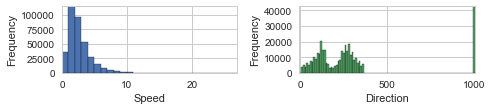

In [6]:
plot_speed_and_angle_distribution(df.speed, df.dir)

In [7]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
df['month'] = df['date']%10000//100
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
df.describe()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

date          HrMn            dir          speed  \
count  3.622460e+05  362246.00000  362246.000000  362246.000000   
mean   2.001603e+07    1142.66531     287.071871       2.378766   
std    1.113944e+05     678.73662     277.331580       1.792495   
min    1.979010e+07       0.00000       0.000000       0.000000   
25%    1.993013e+07     600.00000     140.000000       1.000000   
50%    2.004122e+07    1130.00000     200.000000       2.100000   
75%    2.011102e+07    1700.00000     320.000000       3.100000   
max    2.016123e+07    2330.00000     999.000000      26.200000   

               month   dir_windrose  
count  362246.000000  362246.000000  
mean        6.545927     283.826955  
std         3.452641     276.351481  
min         1.000000       0.000000  
25%         4.000000     120.000000  
50%         7.000000     230.000000  
75%        10.000000     300.000000  
max        12.000000     999.000000

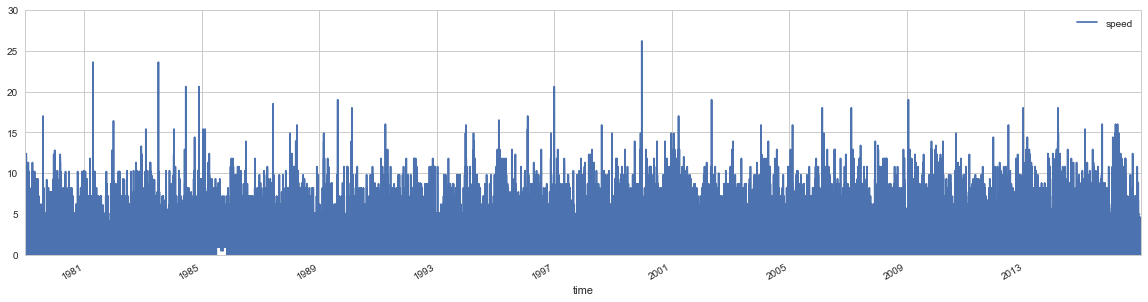

In [8]:
df.plot(y='speed',legend=True,figsize=(20,5))

### 1.2.1 Unit Detection

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

True


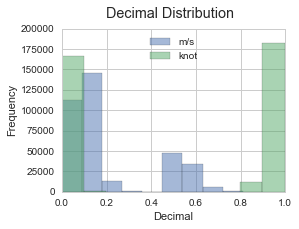

In [9]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))
if 'knot_unit' not in globals():
#     knot_unit = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    knot_unit=True
    if knot_unit:
        df['speed'] = df['speed'] * 1.943845
        df['decimal'] = df.speed % 1
        df.decimal.hist(alpha=0.5, label='knot')
        # need more elaboration, some is not near an integer
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [10]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
else: 
    speed_unit_text = ' (m/s)'

### 1.2.2 Sampling Type Selection

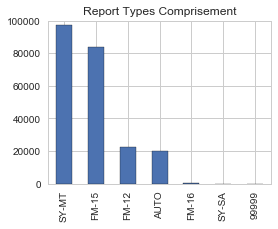

In [11]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.2.3 Sampling Time Selection

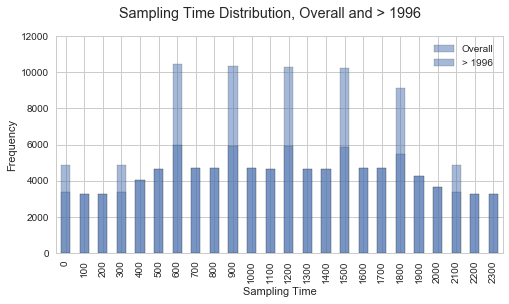

In [12]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df.query('date > @MID_YEAR * 10000')['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

[0]


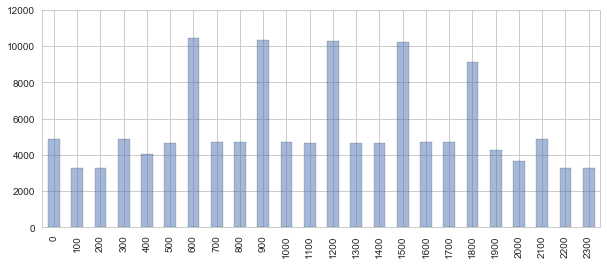

In [13]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# df = df.query("sample_time in @sample_times")
df = df.query("sample_time == @sample_times[0]")
df.drop(['sample_time'], 1,inplace=True)
print(sample_times)

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))

## 1.3 Data Wrangling

### 1.3.1 Artefacts

#### 1.3.1.1 wrong direction record

In [14]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, month, dir_windrose]
Index: []

#### 1.3.1.2 sudden increase in speed

date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
1999-12-27 18:00:00  19991227  1800  SY-MT  160     51         N     12   
1984-11-28 00:00:00  19841128     0  SY-MT  350     40         N     11   
1984-06-17 12:00:00  19840617  1200  SY-MT   70     40         N      6   
2002-05-13 16:00:00  20020513  1600  SY-MT  170     37         N      5   
1999-12-27 19:00:00  19991227  1900  SY-MT  180     37         N     12   
2007-02-14 11:00:00  20070214  1100  SY-MT  180     35         N      2   
2009-01-24 08:00:00  20090124   800  SY-MT  180     35         N      1   
2009-01-24 04:00:00  20090124   400  SY-MT  160     35         N      1   
2009-01-24 10:00:00  20090124  1000  SY-MT  170     35         N      1   
2012-12-21 14:00:00  20121221  1400  SY-MT  180     35         N     12   

                     dir_windrose  incre  incre_reverse  
time                                                     
1999-12-27 18:00:00           290   24.0           14.0  
1984-11-28 00:00:00           100   36.0           38.0  
1984-06-17 12:00:00            20   36.0           36.0  
2002-05-13 16:00:00           280   27.0           20.0  
1999-12-27 19:00:00           270  -14.0            4.0  
2007-02-14 11:00:00           270   14.0           10.0  
2009-01-24 08:00:00           270    2.0            2.0  
2009-01-24 04:00:00           290   15.0           18.0  
2009-01-24 10:00:00           280    2.0            6.0  
2012-12-21 14:00:00           270   14.0           12.0

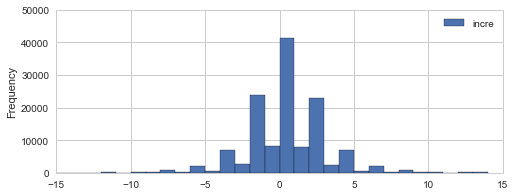

In [15]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [16]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 2


date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
1999-12-27 18:00:00  19991227  1800  SY-MT  160     51         N     12   
1999-12-27 19:00:00  19991227  1900  SY-MT  180     37         N     12   
2012-12-21 14:00:00  20121221  1400  SY-MT  180     35         N     12   
2009-01-24 04:00:00  20090124   400  SY-MT  160     35         N      1   
2009-01-24 08:00:00  20090124   800  SY-MT  180     35         N      1   
2009-01-24 10:00:00  20090124  1000  SY-MT  170     35         N      1   
2007-02-14 11:00:00  20070214  1100  SY-MT  180     35         N      2   
2006-02-18 00:00:00  20060218     0  SY-MT  140     35         N      2   
2009-01-24 07:00:00  20090124   700  SY-MT  190     33         N      1   
1996-02-07 18:00:00  19960207  1800  SY-MT  160     33         N      2   

                     dir_windrose  incre  incre_reverse  
time                                                     
1999-12-27 18:00:00           290   24.0           14.0  
1999-12-27 19:00:00           270  -14.0            4.0  
2012-12-21 14:00:00           270   14.0           12.0  
2009-01-24 04:00:00           290   15.0           18.0  
2009-01-24 08:00:00           270    2.0            2.0  
2009-01-24 10:00:00           280    2.0            6.0  
2007-02-14 11:00:00           270   14.0           10.0  
2006-02-18 00:00:00           310   14.0           25.0  
2009-01-24 07:00:00           260    2.0           -2.0  
1996-02-07 18:00:00           290    4.0           23.0

### 1.3.2 0 Speed

In [17]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.0572973129237


### 1.3.3 Direction re-aligment and 999
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [18]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if integer_data:
    SECTOR_LENGTH = 360/len(effective_column) 
else: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0      3789
10     3928
20     3016
30     3102
40     2448
50     2630
60     1922
70     2066
80     1730
90     2197
100    2083
110    2891
120    2725
130    3563
140    3421
150    4754
160    4626
170    6436
180    5347
190    6230
200    4789
210    5008
220    3309
230    2888
240    1958
250    1685
260    1284
270    1495
280    1389
290    2040
300    2566
310    4939
320    5425
330    7138
340    4891
350    4832
999    7612
Name: dir, dtype: int64

36 10.0


In [19]:
df.query('dir == 999')['speed'].value_counts()

0    7611
2       1
Name: speed, dtype: int64

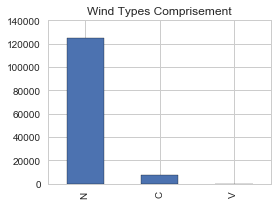

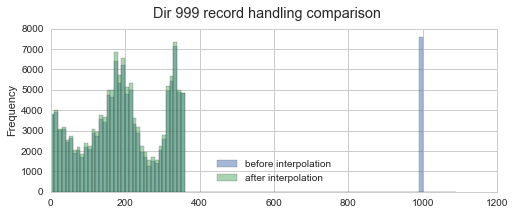

In [20]:
df=realign_direction(df, effective_column)
df=fill_direction_999(df, SECTOR_LENGTH)

## 1.4 Time Shift Comparison

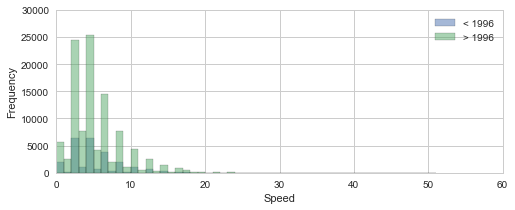

In [21]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, df.speed.max() + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

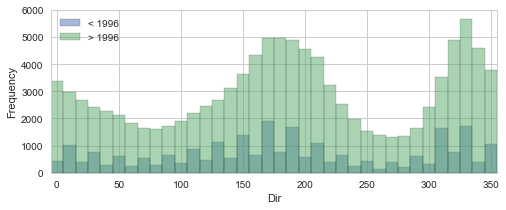

In [22]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), tight='x')

1979 - 1979


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


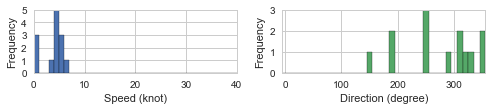

1980 - 1984


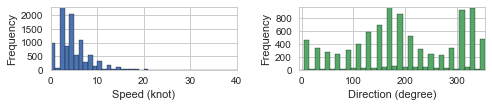

1985 - 1989


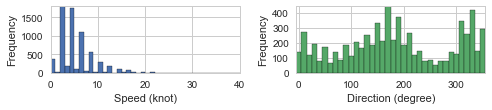

1990 - 1994


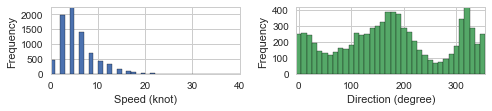

1995 - 1999


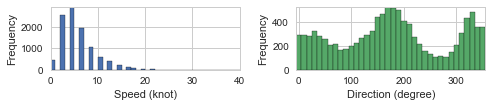

2000 - 2004


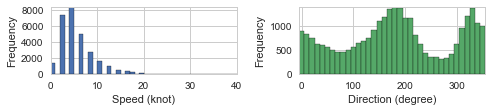

2005 - 2009


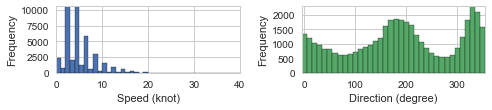

2010 - 2013


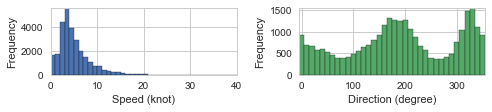

In [23]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text)

(0, 10.0)

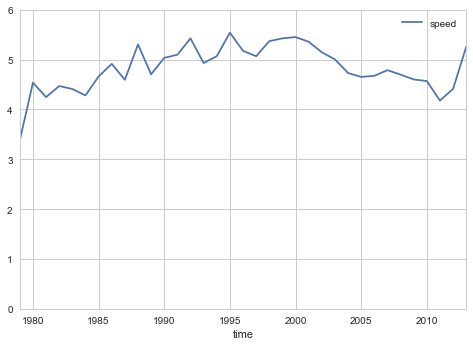

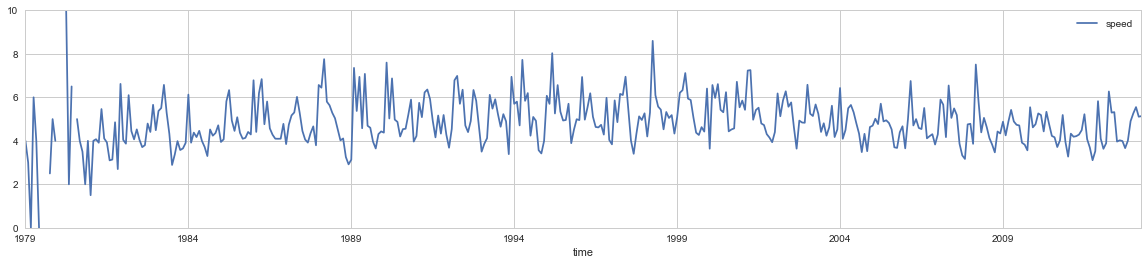

In [24]:
df.resample('A').mean().plot(y='speed')
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [25]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, month, dir_windrose]
Index: []

In [26]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    den, _ = np.histogram(df[column], bins=bins, density=True)
    y_top=max(den)*1.2
    for year in arange(1980, 2016):
        end_year = year
        sub_df = df[str(year):str(end_year)]
        if len(sub_df) > 5000:
            plt.figure()
            df[column].hist(bins=bins, alpha=0.3, normed=True)
            sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
            plt.gca().set_ylim(top=y_top)
            plt_configure(title=str(year))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANAAAAB6CAYAAADOI938AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAADDpJREFUeJzt3Xts0+Uex/H31q5dd4EBQzhqNs/QBYxExGU7ZDo4JPPy
h8eDqGwhw4R/1JggBo0XdE6Y7mJMWMwULzHiBqIBQsDEGCfkoOy4UAJmXERDPBtZ6IDuwrZutF2f
8weubuzSbU/XX9t9X8mS7ff8uj5P0k+f/n6/5/dtjFJKIYSYlFijOyBEJJMACaFBAiSEBgmQEBok
QEJokAAJoUECZCCHw8GGDRvIyckhNzeXV199lc7OTgA8Hg9btmwhJyeHnJwcKisr6e/v9z9Wt10E
iRKG8Hq9atWqVWr9+vXq7Nmz6pdfflGrVq1STz/9tFJKqfLycpWfn69OnDihjh49qnJzc1V1dbX/
8brtIjgkQAZpbGxUmZmZ6tKlS/5tdrvdv+3uu+9WdXV1/rZ9+/apZcuWqf7+ftXX16fVLoLHbPQM
OF3dcsstfPLJJ8ydO9e/LSYmBoCWlhZ6e3vJzs72t2VlZeF0Omlubqajo0Or/bbbbpv6AU4Tcgxk
kFmzZpGXlzdk2+eff056ejqtra3YbDaSk5P9bQNBczgc2u0ieGQGChMff/wx33//Pdu3b6e9vR2r
1Tqk3WKxAOB2u+nt7dVqF8EjM1AYqK6u5r333uP1119n+fLlxMfHD3uhD/xts9m020XwyAxksLff
fpuamhpKSkooLCwEYP78+bhcLrq7u0lKSgLg8uXLAMybN4+4uDitdhE8MgMZqKqqitraWsrKyvzh
AVi4cCE2m43jx4/7t9ntdlJTU0lLS9NuF0Fk9GnA6er06dNq4cKFqrKyUl26dGnIj8fjUVu3blUr
V65Udrtd1dfXq9zcXLV9+3b/43XbRXDEKBXaG+oGvytOZ19//TX79+8fsa2iooJ58+axY8cOfv75
Z+Li4sjLy6OgoIDY2OsfGtxut1a7GN2999477n0NCdB4Ouh0Otl/9juSU2bQ1XGVfy96kDlz5oSg
h3rGO75IJeMbSt6OhNAgARJCgwRICA0SICE0SICE0CABEkKDBEgIDRIgITRIgITQEBarsX0+H+3t
7f6/Z82aZWBvhBi/sAhQe3s7Oxv2kjgjiZ6r3azNWW10l4QYl7AIEEDijCSSU2b4/1ZK4XF78Ljd
eNweQrxkT4hxCZsA3cjlctHS2skMTyxX2zpxuVxGd0mIYcLiJMJos43JbMYcF4fJHLY5F9NcWLwy
ZbYRkSosZiCQ2UZEprAJkBCRSAIkhAYJkBAaJEBCaJAACaEh4Ckvn89HSUkJ586dw2KxUFpaSnp6
ur/9m2++YceOHZhMJjIzMykpKZHSSWLaCPhKr6urw+1289VXX7Fp0ybKy8v9bX19fWzbto0vvviC
3bt3093dzeHDh6e0w0KEk4Az0PHjx7n//vsBWLJkCadOnfK3WSwWdu/e7S9Y7vV6h30rwGj/czCH
w0FHZwf9MdDV2UFjYyPAsG0D9Z3DXbQXj4z28U1EwAANLlAOYDKZ8Hq9mM1mYmNjSU1NBaCmpgaX
y0Vubm7AJ72xcF1zczPHXE3MnD0bk4LFixcDDNsWCXWdpfBgZJvom0PAACUlJdHT0+P/2+fzYR60
WsDn8/Huu+/yxx9/8P777/u/ZU2I6SDgMdDSpUs5cuQIACdPniQzM3NIe3FxMdeuXeODDz6Q754R
007AGSg/P5+jR49SUFCAUop33nmHgwcP4nK5uOuuu9izZw9ZWVk89dRTAKxbt478/Pwp6/BId6/K
WT9hlIABio2NZcuWLUO2LViwwP/7r7/+GvxejWGku1cjoei8iE4RufT5xrtXhTCKfPYRQoMESAgN
EiAhNEiAhNAgARJCgwRICA0SICE0SICE0CABEkJDxAVIamaLcBJxS3mkiqkIJxE3A4FUMRXhIyID
JES4kAAJoUECJIQGCZAQGiRAQmiQAAmhQQIkhIaAAfL5fBQXF7NmzRqKiopoamoatk9vby8FBQWc
P39+SjopRLjSqo0N0NjYyNq1a7lw4cKUdVKIcBUwQGPVxgZwu91UV1eTkZExNT0cJ5/Ph9PpxOl0
4vP5DO2LmD60amPD8DrX46FTXH6kfS9fvkxHRweHm/8LwD/TlpGSkjLhfgVLtBdfj/bxTYR2bezJ
0CkuP9K+aWlpOJ1O/mdtBWDJoiWGFVucDsXXo318E6FdG1uI6UyrNvaaNWtC0UchwpZ2bewBNTU1
weuVEBFCLqQKoSFq7kgbuNV74HchQiFqAjRwq/fA70KEQtgFSPFXACY6j8gt3iLUwu4V1+/1Yj/T
gvL58PX3G90dIcYUdgECsFptKJ8PvHr/R74OUkw1QwI0sLIhISFhSr/VW74OUkw1QwJkP9NKX5+L
+5b+ncTExCl9Lvk6SDGVDAmQLSHBiKcVIujkgEAIDWF5EiFYRqujPfjkgpxYEDqiOkCj1dEeOLkA
yIkFoSUiAjRwcbWnpweXyzWhC6yj1dFOnJE0yiOEGD9DAtTZ0Uavqxefb+649h+4uNraZaG56YJc
YBVhw5AANVw6SldHJ0va55KcnDyux1itNmwJCVitNu0LrEIEiyEBSpyZjNfrMeKpAVm5LYLHsGMg
neMaXSOt3JZlP2IyDAtQMI5rRgrheBcG3XhSYbRlPxIsMRZDz8LpHteMFEKTyTSpviilsMRbiU+I
H3LNSNbTibFExGnssdwYwsl+NBztmtHgYF3ru4bT6QRkJhLXBQyQz+ejpKSEc+fOYbFYKC0tJT09
3d9+6NAhqqurMZvNrF69mieffHJKOxyIzkfDka4ZDQ6Wo8lBu/MgycnJMhMJYBwBGlwb++TJk5SX
l/Phhx8C4PF4KCsrY8+ePdhsNgoLC1m5ciWpqalT3vGxjPTRcLSZaaRtN+4b+2ewYs0m4uKtWOKt
/o94/f39tLS0+J+7/8/AjnTsBMjxVJQJGKCxamOfP3+etLQ0Zs6cCVyvOHrs2DEefvjhMf9np7ON
7s5OrrgdWC1Wrlxppcvdiclk8m9XPjVs22j7Dt6OUiPu2+l08t1/TjD/b5e52NJMZ2wbKDVsWwyM
uG8McLWtna7ODuJtNn63/X59dmppYUf9QRKSEnF19/CPOZnMnz+f9vZ2DjR+hy0xgd4eF/9a/CDA
sG0DwYoUDoeD5ubmkD9vWlpayJ9zPGJUgAshmzdv5oEHHmD58uUArFixgrq6OsxmM3a7ndraWrZt
2wZAVVUVN998M0888cSo/0/qKotwN5HSxVq1sW9s6+npCbiyIJrrKovpR6s29oIFC2hqaqKjowO3
243dbueee+6Zut4KEWYCfoQbOAv322+/+Wtjnzlzxl8be+AsnFKK1atXs3bt2lD1XQjDBQyQEGJ0
cg5VCA0SICE0SICE0BCytXCBlgRFIo/Hw2uvvUZLSwtut5tnn32W22+/nVdeeYWYmBjuuOMO3nzz
zYhebeB0Onnsscf47LPPMJvNUTW2jz76iEOHDuHxeCgsLCQ7O3vC4wvZ6AcvCdq0aRPl5eWheuop
c+DAAVJSUti1axeffvopW7dupaysjI0bN7Jr1y6UUvzwww9Gd3PSPB4PxcXFxMfHA0TV2BoaGjhx
4gRffvklNTU1OByOSY0vZAEaa0lQpHrooYd4/vnngeurtk0mE6dPnyY7OxuAvLw86uvrjeyiloqK
CgoKCrjpppsAompsP/30E5mZmTz33HM888wzrFixYlLjC1mAuru7SUr6qxKOyWTC643s4gaJiYkk
JSXR3d3Nhg0b2LhxI0opf73vxMREurq6DO7l5Ozbt4/Zs2f73/SAqBkbXF/Ue+rUKaqqqnjrrbd4
8cUXJzW+kAV

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN4AAAB6CAYAAADQ6u1PAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAE41JREFUeJztnXtsVFW7xp92pp2ZzvRCuRQCFqVKwIMIFOEYjiVpPsSP
gB4EocWUYyAGYiIQDJYKlQqtUAwaowSFxEBaDO1BgodPPQhI5AgWKXcFJCBO6f02l879stf5Y+ju
zHTa6WVm9t7T95eQdO/VtefdQ599We+7nhXDGGMgCCKixAodAEEMRUh4BCEAJDyCEAASHkEIAAmP
IASAhEcQAkDCkwiNjY1Yt24dZs+ejTlz5qCgoAAGgwEA4HQ6sX37dsyePRuzZ8/G7t274Xa7+b6D
bSfCACNEj8vlYosXL2arVq1it2/fZtevX2eLFy9ma9asYYwxtmvXLjZv3jx29epVdv78eTZnzhy2
d+9evv9g24nQQ8KTADdv3mQTJ05kzc3N/L7q6mp+37PPPstOnz7Ntx07dow9//zzzO12M5vNNqh2
IjzIhb7jEsEZO3YsDhw4gJEjR/L7YmJiAAB1dXWwWq2YNWsW3zZz5ky0tbWhpqYGer1+UO2PP/54
+E9wCELveBJg2LBhyMrK8tl38OBBjB8/Hk1NTVCpVEhMTOTbOgXa2Ng46HYiPNAdT4Ls378fp06d
whdffAGdTgeFQuHTHh8fDwBwOBywWq2DaifCA93xJMbevXuxZ88ebN26FXPnzoVSqewmkM5tlUo1
6HYiPNAdT0KUlJSgrKwMRUVFyM3NBQCMHj0aFosFJpMJGo0GANDS0gIASEtLQ1xc3KDaifBAdzyJ
8Omnn6K8vBw7d+7kRQcAkyZNgkqlwuXLl/l91dXVGDFiBNLT0wfdToQHWVFRUZHQQRC9c+vWLbz7
7rtYtWoVXn75ZVgsFv6fWq1Ge3s7Dh06hClTpkCr1eKDDz7AypUrMXPmTMjlcrS2tg64nQgPMYyJ
dyKs91V4KFNZWYnjx48HbCstLUVaWhoOHTqEqqoqxMXFISsrCzk5OYiN9TzQOByOQbUTPZOZmTmg
fqIX3kBPLJJQnKFlKMRJlzSCEAASHkEIAAmPIASAhEcQAhA0gc5xHIqKivDnn38iPj4excXFGD9+
PN/+008/Ye/evZDL5ViyZAmWLVvWY5+2tjZs3boVRqMRbrcbu3fvplwRMSQJKrzTp0/D4XCgoqIC
165dw65du7Bv3z4AngmUO3fuxNGjR6FSqZCbm4vs7GxcuXIlYJ+PPvoIixYtwoIFC1BVVYW//vqL
hEcMSYI+al6+fBkvvPACAGDatGn4/fff+bb79+8jPT0dycnJiI+PR2ZmJi5dutRjnytXrqCpqQlv
vPEGTpw44TMVhSCGEkHveN41fAAgk8ngcrkgl8thMpl8ppOo1WqYTKYe+9TV1SEpKQkHDx7E559/
jgMHDmD9+vW9fr5UkugUZ2iRSpwDJajwNBoNzGYzv81xHORyecA2s9mMxMTEHvukpKQgOzsbAJCd
nY1PPvkkaIDRnkiNJBRnaBnMxSHoo+aMGTNw7tw5AMC1a9cwceJEvi0jIwNarRZ6vR4OhwPV1dWY
Pn16j30yMzPx888/AwAuXbqEJ598csCBE4SUCXrHmzdvHs6fP4+cnBwwxvDhhx/ixIkTsFgsWL58
OTZv3ozVq1eDMYYlS5YgLS0tYB8AyM/Px9atW3HkyBFoNBrs2bMn7CdIEGKEajVDAMUZWvobJ2MM
FovFZ19CQgLvSxMuBvN90kTYKIHjOOh0Op99w4YNGxIzDCwWC3658gBKZQIAwGaz4D9mPAG1Wi1w
ZD1DwosSdDodDl/8Buokz2iy2WjC67OXYPjw4QJHFhmUygSoEhKEDqPPkPCiCHWSBokpSUKHQfSB
6H8OIQgRQnc8ieI/oGA2mwHxjpMRfpDwJIr/gEJzUz2cCS6BoyL6CglPwngPKCgUfh6YjMFsNkOp
VHrtojuiWCDhRSlOpwsXb9RgVJrnLmizWaCOsQkcFdEJCS+KUShUvkPsdr1wwRA+kPCiFI7jYDTq
oUrwPIJaLVakKDiBoyI6IeFFKZYOC+62/IoRsR4b9g69AVmjJgscFdEJCU+icBwHg14Hh8Pz3mY0
6sFSfAdPVOoEqJM98yVdLmfEYyR6hoQnUXQ6Hc7XnkViSjIAoLm+Hk+oaJERqUDCkzAqTdcdTamj
JbWkBAkvSmDwpBCcj9a2c7mHzqOl/2O31WIFx40M0ktYSHhRgtvlRmNbB2KUHsuNxmYj4tXRdxcM
NPeurq4Ov9T+hKSUFACegaRpupE+fkBiI6K+mp2cOHEC5eXlqKioCM9ZRRmB5trpdLpupZlymRzy
uDgAQKw8LlLhRRT/UjkAqNE+hEKllNRAUkR9NQHPWm9Hjx6l8qV+4D/XDgDqHjyEAwMXVyAxA+Kf
PMtxHOw2u0+MDrsDLFZaf09BhddXX00AvK/mtWvXAvbR6XT4+OOP8d5776GwsDDkJxPN+M+1S9Bo
YDXZB3y89vZ2HDpfAXVil5jNHSb815zlGDFixKBiDSf+o7kAUN9cA02qtOYhRsxX0+FwYMuWLSgo
KIBCoehzgFLxVwxlnJ6qEyO/bTAY0OhugMli4ve1tDajwwnI2z1F0EajAXJFHBTt7QG3Owx6IGE8
H2djYyP+bmiDxtY1o8GkM+DixYsYPXp0yM5loHTGyRiDzdZVY9rU1AS724F4r8Ejh9sJo9Hoc643
b97k13IXIxHz1bxz5w60Wi2Kiopgt9tx7949lJSUYMuWLb1+fjSa8wSjra3N59Gy2dGIlOEpGDmm
K0/nNDsRa7IjNTUVAGBuN0CukPe4HcsAm82GSZMmAfBcJFMtWqQMT+WPqYiNwzPPPCO4rb7392k2
m33e6SzMikRNIn9eQPdzlTFE5DwGc7ENKrwZM2bg7NmzWLBgQa++mgkJCaiursbq1asRExPTrc/U
qVPx3XffAQBqa2uxcePGoKIbqjDGEK9UQJnguZvJFQo4HA4+VQD0P13gcjhwTduIuKQ7AIDa2r/h
Vkpj/l636U9BwmbwDMJ4X/wj4TrWHyLqq0n0DYvFgromA5KcngGEuoY2xCrj4JJ3Pb73N11gNVuh
i62FwhQPAKjXS++9qK+4XS5U36pDU4fnXK1WM2ZMSvNxHRNaiEGFFxsbi+3bt/vsy8jI4H/Ozs7m
bdl76+PNuHHjUFlZ2d9YhxQyuW9qwDtV0LmvvyjUqq5KF7V0HLkGgveUKKvVgqobD5GcPAyAOOz/
KIFORD0cx8Fut/OVLXabHRwn7BQp0Quvra3NZ1vseSZCfJg6jPit6RekODweo2KobBG98I7fPsn/
PNRMWonudZgdRsOAkuUqjVpUlS2iFx4ZtA5t/BPmfUmWM45Dh9EAg/5RXm+AYg0nohfeUMC/fCtQ
HeZQxmf6Ux8GhaxmK645f0O9shaAOCtbJCU8juPQ/qg6oZNoeOfzr8UcbB0mASj7KdZIIynhWYwm
VDb8D4aP9NQS+tcWSnnFHO9azMHWYRLiR/TC867WsNps0FvdiH+UWDZa3D5zs4b6ijmEdBC98Opb
usp+Oqs1OhPJMnn38KWwYg6te0CIXniDrdYQI/6TOZsa62BRWKF8VAImlG2DFGocowXRC6832KN3
us7Sn/b2dslMsPVdSDEG9c1G2JhnupRQtg3+NY5iKK2KViQtPKvZgn/dOY3RHWMAAM21jUgangwg
ufeOEcZ/0MdsNncrWZLL40Rh29DN9p0IC5IWHgAkJKr5dzqToUPgaALjP+jT3tKGMdzTSBvtuWCI
JcHrn3iWgluXVJG88KSC96CPrkWHai97dbEkeP0Tz0a9HhPr1Hjsscf436F3vtAgaeH5e0k6HC5w
4Phtp8MZ8Xe

In [27]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares = []
    years = []
    for year in arange(1980, 2016):
        start_year, end_year = year-1, year+1
        sub_df = df[str(start_year):str(end_year)]
        if len(sub_df) > 5000:
            density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            y_mean = np.mean(density_all)
            SS_tot = np.sum(np.power(density_all - y_mean, 2))
            SS_res = np.sum(np.power(density_all - density, 2))

            R_square = 1 - SS_res / SS_tot
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAU4AAADECAYAAADwD8hjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFStJREFUeJzt3X1QlXXex/H34ckUUHQdd5pMA9IxZFo3GXd2fKhmQpwm
0xpxAgdnQk1cs2hHlwexo3NYlS3ZSVdca+0fDFlGd7qb3J0yt9YtkD+cRQbImuVm2TW7LbUtjg8c
hd/9B+OpIwT8CDjnks/rL86PC/leTfPhejjX+biMMQYREem3sGAPICLiNApOERFLCk4REUsKThER
SwpOERFLCk4REUsRfW3Q0dFBUVERLS0tuFwutm3bxo0bN1i7di333HMPABkZGTz66KNUVVVRWVlJ
REQE69at4+GHH+batWts2rSJixcvEh0dTUlJCRMmTKCuro5f//rXhIeHM2/ePJ599tmh3lcRkcFh
+nDs2DGTn59vjDHm5MmTJicnx1RVVZkDBw4EbPfFF1+Yxx57zLS3t5tvvvnG//Xrr79udu/ebYwx
5u233zYej8cYY8zjjz9uWltbTWdnp1m9erVpbGzsaxQRkZDQ56n6I488gsfjAeDcuXOMHTuWhoYG
PvjgA1asWEFhYSFer5f6+np++tOfEhUVRWxsLFOmTOHMmTOcOnWK+fPnA7BgwQJqamrwer34fD6m
TJmCy+Vi3rx5VFdXD+1fCBGRQdLnqTpAREQEeXl5HDt2jN27d3P+/HnS09NJTk5m37597N27lxkz
ZhAbG+v/mejoaLxeL16v178eHR1NW1sbXq+XmJiYgG3/85//9DrDqVOnBrJ/IiJ9mj17ttX2/QpO
gJKSEjZu3Mjy5cuprKzkxz/+MQCpqal4PB5SUlK4fPmyf/vLly8TGxtLTEyMf/3y5cuMHTs2YO27
632x3blQcerUKUfO7tS5wbmzO3VucO7sAzko6/NU/c0332T//v0AjB49GpfLxbPPPkt9fT0ANTU1
zJw5k/vvv59Tp07R3t5OW1sbzc3NTJ8+nQceeIC//e1vAJw4cYLZs2cTExNDZGQk//73vzHG8OGH
H5KSkmI9vIhIMPR5xLlw4UIKCgpYsWIFN27coLCwkDvvvBOPx0NkZCQTJ07E4/EQExNDVlYWmZmZ
GGN44YUXGDVqFBkZGeTl5ZGRkUFkZCS7du0CYNu2bWzcuJGOjg7mzZvHT37ykyHfWRGRwdBncI4Z
M4ZXXnml23plZWW3teXLl7N8+fKAtdGjR7N79+5u286aNYuqqiqbWUVEQoLeAC8iYknBKSJiScEp
ImJJwSkiYknBKSJiScEpImJJwSkiYknBKSJiScEpImKp3x/ycbvo6Oigubm523piYiLh4eFBmEhE
nGbEBWdzczNZBRWMGTfJv3bl6y8o35HJ9OnTgziZiDjFiAtOgDHjJhEz/q5gjyEiDqVrnCIilm6r
I86erl/q2qWIDLbbKjhvvX6pa5ciMhQGVA88atQo8vPzcblcTJs2DbfbTVhYWEjUA+v6pYgMtT6v
cb7//vtA1wcX5+bm8tvf/pYdO3aQm5tLRUUFxhiOHz/Ol19+SXl5OZWVlRw4cIDS0lJ8Ph+HDh1i
+vTpVFRUsHTpUsrKygBwu93s2rWLQ4cOcfr0aZqamoZ2T0VEBsmA6oEbGxuZM2cO0FX5W11drXpg
ERkxBlQP/NFHH+FyuYDAyt+hrAeGvtvoWltbu601NDTQ1tbW6zY9bTfYnFpv7NS5wbmzO3VucPbs
NgZUD9ze3u5f763yd7jrgWNjY+Ht/wtYS05ODrg51NM2PW03mJxcm+rEucG5szt1bnDu7MNWD5yc
nExtbS3QVfmbkpKiemARGTEGVA+cmJjIli1bKC0tJSEhgbS0NMLDw1UPLCIjwoDrgQ8ePNhtTfXA
IjIS6JFLERFLCk4REUsKThERSwpOERFLCk4REUsKThERSwpOERFLCk4REUsKThERSwpOERFLCk4R
EUsKThERSwpOERFLCk4REUsKThERSwpOERFLvX6Q8fXr1yksLOSzzz7D5/Oxbt067rzzTtauXcs9
99wDQEZGBo8++mhIdKqLiAyHXoPzrbfeIi4ujpdeeon//ve/LF26lPXr1/P000+TnZ3t3+5mp/qR
I0dob28nMzOTuXPn+jvVN2zYwNGjRykrK6OoqAi3282ePXu4++67eeaZZ2hqaiIpKWnId1ZEZDD0
GpyLFi0iLS0NAGMM4eHhNDQ00NLSwvHjx5k6dSqFhYUBnepRUVEBneqrV68GujrVy8rKAjrVAX+n
en+CU/XAw8+pc4NzZ3fq3ODs2W30GpzR0dEAeL1ennvuOXJzc/H5fKSnp5OcnMy+ffvYu3cvM2bM
GPJOdVA98HBz6tzg3NmdOjc4d/YhqQf+/PPPWblyJUuWLGHx4sWkpqaSnJwMQGpqKk1NTcPSqS4i
Eip6Dc4LFy6QnZ3Npk2bWLZsGQCrVq2ivr4egJqaGmbOnKlOdREZUXo9Vf/973/PN998Q1lZGWVl
ZQDk5+ezfft2IiMjmThxIh6Ph5iYGHWqi8iI0WtwFhUVUVRU1G29srKy25o61UVkpNAb4EVELCk4
RUQsKThFRCwpOEVELCk4RUQsKThFRCwpOEVELCk4RUQsKThFRCwpOEVELCk4RUQsKThFRCwpOEVE
LCk4RUQsKThFRCxZ1wPfe++95Ofn43K5mDZtGm63m7CwMNUDi8iI0esR58164IqKCv7whz/g8XjY
sWMHubm5VFRUYIzh+PHj/nrgyspKDhw4QGlpKT6fz18PXFFRwdKlS/2fIu92u9m1axeHDh3i9OnT
NDU1DcvOiogMhl6Dc9GiRTz//PPAt/XAjY2NzJkzB+iq/K2urg6oB46NjQ2oB54/f75/25qamoB6
YJfL5a8HFhFxCut64JKSElwul//7Nyt/h6MeWL3qw8+pc4NzZ3fq3ODs2W30GpzQVQ+8fv16MjMz
Wbx4MS+99JL/e71V/g5FPbB61YeXU+cG587u1LnBubMPeq96T/XASUlJ1NbWAl2VvykpKaoHFpER
xboeePPmzRQXF1NaWkpCQgJpaWmEh4erHlhERowB1QMfPHiw25rqgUVkpNAb4EVELPV5c2gk6ujo
oLm5udt6YmIi4eHhQZhIREKJgrMHzc3NZBVUMGbcJP/ala+/oHxH5pDdeRcR51Bwfo8x4yYRM/6u
YI8hIiFI1zhFRCwpOEVELCk4RUQsKThFRCwpOEVELCk4RUQsKThFRCwpOEVELCk4RUQsKThFRCwp
OEVELPUrOE+fPk1WVhYATU1NzJ8/n6ysLLKysvjzn/8MQFVVFU8++STLly/n/fffB+DatWts2LCB
zMxM1qxZw6VLlwCoq6sjPT2dp556it/97ndDsV8iIkOmzw/5eO2113jrrbcYPXo0AI2NjTz99NNk
Z2f7t7lZD3zkyBHa29vJzMxk7ty5/nrgDRs2cPToUcrKyigqKsLtdrNnzx7uvvtunnnmGZqamkhK
Shq6vRQRGUR9HnFOmTKFPXv2+F83NDTwwQcfsGLFCgoLC/F6vaoHFpERpc8jzrS0NM6ePet/ff/9
95Oenk5ycjL79u1j7969zJgx47aqBx6KCmGn1qY6dW5w7uxOnRucPbsN68/jTE1N9df5pqam4vF4
SElJua3qgQe7QtjJtalOnBucO7tT5wbnzj7o9cA9WbVqFfX19QDU1NQwc+ZM1QOLyIhifcS5detW
PB4PkZGRTJw4EY/HQ0xMjOqBRWTE6FdwTp482V/nO3PmTCorK7tto3pgERkp9AZ4ERFLCk4REUsK
ThERSwpOERFLCk4REUsKThERSwpOERFLCk4REUsKThERSwpOERFLCk4REUsKThERSwpOERFLCk4R
EUsKThERSwp

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUsAAADECAYAAAAWJgMnAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFcFJREFUeJzt3XtsU+X/B/B3tzJg3cbla0zMb4LbhCguDerCJdwTZWpE
geDiSqYGJGwiOq7dxi6QLYwFRRQlgMGYFMZoAI35GSMX0arAQvoVkAkSl7mEjetAaWFrt/X8/uC3
6ujlPCs9p2ft+5WQQE+Xfvpw9u7pOc9zPjpJkiQQEVFQcZEugIioP2BYEhEJYFgSEQlgWBIRCWBY
EhEJYFgSEQnQyz2hs7MTRUVFaGlpQVxcHCorK6HX61FUVASdTodRo0ahoqICcXFxsFqtqKurg16v
R0FBAWbMmIGOjg6sWrUKbW1tMBgMqKmpwfDhw9V4b0REYSN7ZPnDDz+gq6sLdXV1WLJkCTZv3ozq
6moUFhaitrYWkiThyJEjuHbtGiwWC+rq6rBz505s2rQJbrcbe/bswejRo1FbW4vZs2dj69atarwv
IqKwkg3LtLQ0dHd3w+PxwOl0Qq/Xo6GhAePGjQMATJ06FceOHcOZM2fw5JNPIiEhAcnJyRgxYgTO
nz8Pu92OKVOmeJ97/PhxZd8REZECZL+GJyYmoqWlBc8//zxu3ryJbdu24eTJk9DpdAAAg8EAh8MB
p9OJ5ORk788ZDAY4nc5ej/c8V47dbg/1/RARBfX000+H9HOyYfn5559j8uTJWLFiBS5duoTXX38d
nZ2d3u23b99GSkoKkpKScPv27V6PJycn93q857kiQn1D4Wa32zVRi1bqAFhLIKzFP63VEirZr+Ep
KSneI8MhQ4agq6sLY8aMQX19PQDAZrMhKysLRqMRdrsdLpcLDocDjY2NGD16NJ566in88MMP3udq
ZdCIiPpC9sjyjTfeQElJCUwmEzo7O7Fs2TJkZmairKwMmzZtQnp6OrKzsxEfH4+8vDyYTCZIkoRl
y5Zh4MCByM3NhdlsRm5uLgYMGID3339fjfdFRBRWsmFpMBjw4Ycf+jy+a9cun8dycnKQk5PT67HB
gwfjo48+uo8SiYgij5PSiYgEMCyJiAQwLImIBDAsiYgEMCyJiAQwLImIBDAsiYgEyM6zJCLq7u5G
Y2NjwO0ZGRmIj49XsSL1MSyJSFZjYyPyimuROORBn213/r4KS7UJo0ePjkBl6mFYEpGQxCEPImnY
/0S6jIjhOUsiIgEMSyIiAQxLIiIBsucsDxw4gC+++AIA4HK5cO7cOdTW1mL9+vVsWEZEMUP2yHLu
3LmwWCywWCx44oknUFpaik8++YQNy4gopghfDf/111/xxx9/oKKiAh9//HGvhmU///wz4uLivA3L
EhISejUse/PNN73PFQ1LLfXh0UotWqkDYC2BRGstzc3NQbefPXs2aH8tLY1LqITDcvv27ViyZAkA
QJIkRRuWAezBo9U6ANYSSDTXkpycDPzv5YDbMzMzA86z1Nq4hEooLG/duoWmpiZMmDABABAX98+3
d6UallF04QoQ6u+EwvLkyZOYOHGi9989DcvGjx8Pm82GCRMmwGg0YvPmzXC5XHC73T4Ny4xGIxuW
xTCuAKH+Tigsm5qakJqa6v232WxmwzLqs1hfAUL9m1BY9lyg6ZGWlsaGZUQUUzgpnYhIAMOSiEgA
7zpEmiZ3Fb27u1vFaiiWMSxJ0+SuopvnG70LJIiUxLAkzeNVdNICnrMkIhLAsCQiEsCwJCISwLAk
IhLAsCQiEsCwJCISwLAkIhIgNM9y+/bt+O6779DZ2Ync3FyMGzcORUVF7MFDRDFD9siyvr4ev/zy
C/bs2QOLxYLLly+jurqaPXiIKKbIHln+9NNPGD16NJYsWQKn04nVq1fDarWyB08EaKUOoO+1hNrD
Re7nQqlFSdFaC3vwCITlzZs30draim3btuHixYsoKChgD54YrgMIrZZQe7jI/RzAfcUf9uDxT9Ee
PEOHDkV6ejoSEhKQnp6OgQMH4vLlfwaNPXiIKBbInrN8+umn8eOPP0KSJFy5cgXt7e2YOHEi6uvr
AQA2mw1ZWVkwGo2w2+1wuVxwOBw+PXh6nquVTxgior6QPbKcMWMGTp48iXnz5kGSJJSXlyM1NZU9
eIgopghNHVq9erXPY+zBQ+EieTxoamryuy3Q40Rq4/0sKeLaHddQvuM6Eof43hG97eI5/Cf18QhU
FXuC3ZWeH1oMS9KIQDf4vfP3lQhUE5uC3ZWeH1oMSyL6F35oBca14UREAhiWREQCGJZERAIYlkRE
AniBh6JSsGkwAJCRkYH4+HgVK6L+jmFJUSnYNJg7f1+FpdoU8MYPRP4wLClqBZoGQxQKhiVRDOEq
ndAxLKnfkjwetLa24sKFCz7b+IvvH1fphE4oLOfMmYOkpCQAQGpqKvLz89mDhyKu3XENlqM67P/v
YZ9t/MUPjKt0QiMbli6XC5IkwWKxeB/Lz89HYWEhxo8fj/Lychw5cgRjx46FxWLB/v374XK5YDKZ
MGnSJG8PnqVLl+Lrr7/G1q1bUVpaquibotjBX3xSi2xYnj9/Hu3t7ViwYAG6urqwfPlyNDQ0KN6D
h7Spu7sbzc3NvVqI/HsbAL9Tcvi1OHoFu8Ue8M9+0d/JhuWgQYOwcOFCvPLKK/jzzz+xaNEiVXrw
aKnBkVZq0UIdzc3NqNl9BolDfPuxtF08h8HJ/+kX58PkGmyFSgv/Rz381SLSAK6vgt1i787fV2Ge
b4yKOa2yYZmWloaRI0dCp9MhLS0NQ4cORUNDg3e7Uj14tNJ+QivNlrRSR3JyMhKHXA741be/fC0O
1mArVFr5PwIC1yLSAC4UctO0tDQuoZJd7rhv3z5s2LABAHDlyhU4nU5MmjSJPXiISNa/Zyz4+9Of
vqLLHlnOmzcPxcXFyM3NhU6nw/r16zFs2DD24CEiWcFmLPS3lVSyYZmQkOA34NiDh4hERMtKKt51
iIhIAMOSiEgAw5KISADDkohIAMOSiEgAw5KISADDkohIAMOSiEgAw5KISADDkohIAMOSiEgAw5KI
SADDkohIgFBYtrW1Ydq0aWhsbERzczNyc3NhMplQUVEBj8cDALBarZg7dy5ycnJw9OhRAEBHRweW
Ll0Kk8mERYsW4caNG8q9EyIiBcneoq2zsxPl5eUYNGgQAKC6ujpizcqC9TwGgIyMjKi4fT0RaY9s
WNbU1ODVV1/Fjh07AEC1ZmWB+ofc7f/i2+Olp9fHyJEjhV/jfmqJBC3UoUQPl0hgDx5tUOr/QQlB
w/LAgQMYPnw4pkyZ4g1LNZqVAf57dgTr/wJEd18VrdShVA8XtUXzvgKo34MnVEr8PwRzPx9mQcNy
//790Ol0OH78OM6dOwez2dzrvKNSzcqIiLQmaFju3r3b+/e8vDysXbsWGzduRH19PcaPHw+bzYYJ
EybAaDRi8+bNcLlccLvdPs3KjEZjn5uVXbhwwecx9p4mokiRPWd5L7PZrEqzssUbfBscaa33dH/G
i2VEfSMclhaLxft3NZqV9Yfe0/1ZY2Mj8oprA14s609d94jU0OcjS4oegbruSR5PwFMePBVCsYph
ST7aHddQvuM6Eof4fk2PhlMhwT4MAJ6CIP8YluRXoKPOaDgVEuzDgKcgKBCGJcWkQB8GRIHwRhpE
RAIYlkREAhiWREQCGJZERAIYlkREAhiWREQCYmLqENdBkyhOWKdAYiIsuQ6aRHHCOgUiG5bd3d0o
LS1FU1MTdDod1q1bh4EDB6KoqAg6nQ6jRo1CRUUF4uLiYLVaUVdXB71ej4KCAsyYMQMdHR1YtWoV
2traYDAYUFNTg+HDh4f9jcitZ47WScg8ag6/aN1X6P7IhmVP87G6ujrU19fjgw8+gCRJEevDE0i0
r2cOhEfNROq

## 1.5 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

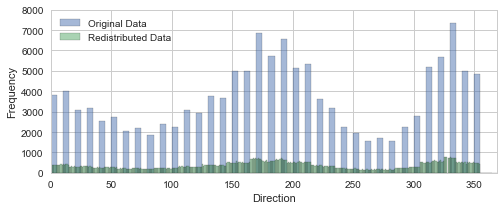

In [28]:
if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

Redistribute upward, e.g. 0 -> [0,1]


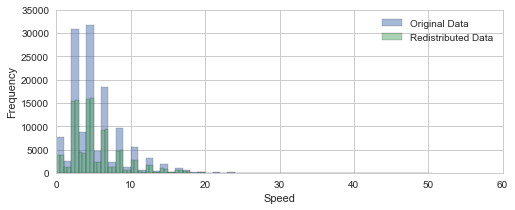

In [29]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.6 Generate (x,y) from (speed,dir)

In [30]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [31]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [32]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? True
Report type used: SY-MT
Sampling time used: [0]
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


date          HrMn           dir         speed         month  \
count  2.806600e+04  28066.000000  28066.000000  28066.000000  28066.000000   
mean   2.011260e+07   1148.574788    190.745288      4.970712      6.138780   
std    9.704539e+03    696.268540    103.438455      3.369369      3.519564   
min    2.010010e+07      0.000000     -4.986196      0.000259      1.000000   
25%    2.010110e+07    500.000000    120.250914      2.801845      3.000000   
50%    2.011090e+07   1100.000000    189.209888      4.143457      6.000000   
75%    2.012070e+07   1800.000000    291.390825      6.319304      9.000000   
max    2.013043e+07   2300.000000    354.989938     35.164171     12.000000   

       dir_windrose             x             y  
count  28066.000000  28066.000000  28066.000000  
mean     234.555013     -1.233491     -0.066619  
std      214.959077      4.985859      3.110743  
min        0.000000    -35.059729    -21.181042  
25%      110.000000     -4.190693     -2.186894  
50%      210.000000     -0.185727     -0.353921  
75%      280.000000      2.465441      1.904472  
max      999.000000     13.824255     19.257946

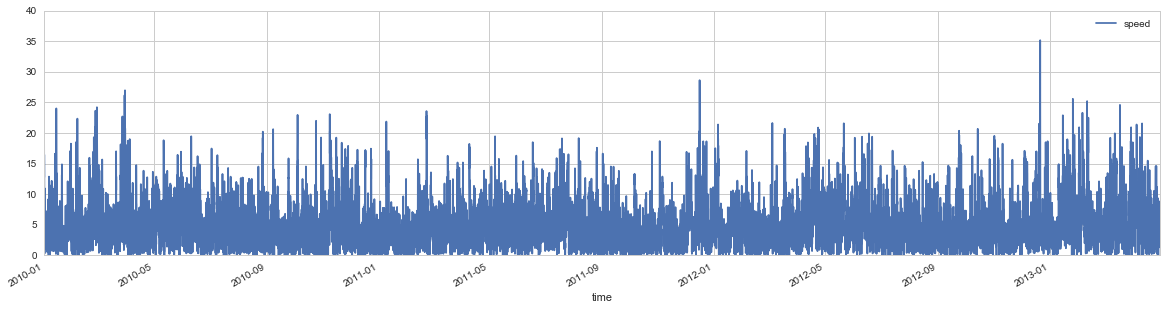

In [33]:
df.plot(y='speed',legend=True,figsize=(20,5))

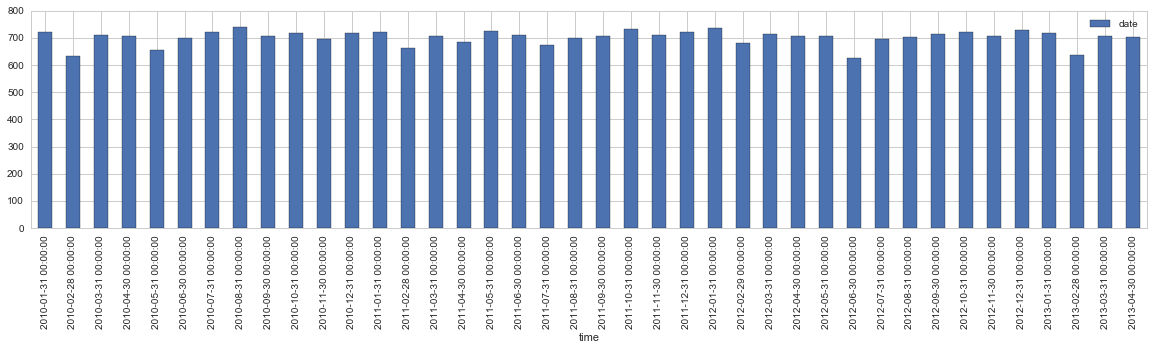

In [34]:
# Accumulation by month
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


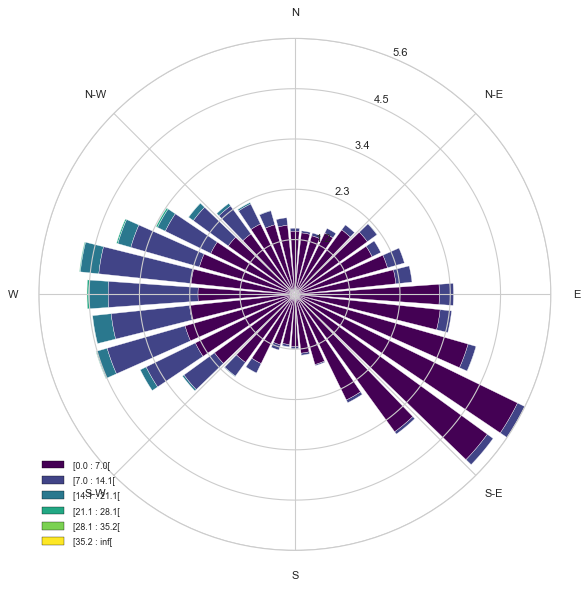

In [35]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [36]:
if len(df) > 1000000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=500000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [37]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASEAAADSCAYAAAAFbHYYAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlYVeXa+PHvZtiKDIKiljM4pILmgKgN6AE5pqecEIGM
VMjU4+8YaQZ6VCxNNKksX0VPw1ExDo71qm/aoCb9cDiKkQhmaYgzIohMyrjfP3zZR2QeNmuz9/25
Lq5g7fWsdT+Gt89a63nupdJoNBqEEEIhJkoHIIQwbpKEhBCKkiQkhFCUJCEhhKIkCQkhFCVJSAih
KDNdHbikpIRly5Zx4cIF1Go1K1asoEuXLtrP9+/fz5YtWzA1NaVnz54sW7YMoMI2KSkphISEoFKp
6NGjB6GhoZiYSP4UwhDo7G/yDz/8QEFBAdu3b2f+/PmsWrVK+9mDBw9Yu3YtW7duJTo6mpycHI4c
OVJpm7CwMIKCgoiKikKj0XDo0CFdhS2EaGQ6S0JxcXE8//zzAPTv359z585pP1Or1URHR2NhYQFA
UVERzZo1q7RNYmIirq6uALi5uXHs2DFdhS2EaGQ6uxzLycnByspK+7OpqSlFRUWYmZlhYmKCvb09
AJGRkeTl5fHss89y4MCBCttoNBpUKhUAlpaWZGdnV3nuuLg4HfRICFFTgwYNqvG+OktCVlZW5Obm
an8uKSnBzMyszM9r1qwhOTmZdevWoVKpKm3z6P2f3NxcbGxsqj1/bf4QHpeens6uw79hbWNXZnt2
1l0mufekdevWdT52Q4iLi6tX//Sd9K9pq+0gQGeXYwMHDiQmJgaA+Ph4evbsWebzpUuXkp+fz4YN
G7SXZZW16dOnDydPngQgJiYGFxcXXYUthGhkOhsJeXp6Ehsbi6+vLxqNhpUrV7Jv3z7y8vJwdnZm
165duLi4MHXqVABeffXVCtsABAcHs2TJEj788EMcHR0ZNWqUrsIWQjQynSUhExMT3n333TLbunXr
pv3+119/rbDd420AHBwc2LZtW8MGKITQCzLZRgihKElCQghFSRISQihKkpAQQlGShIQQipIkJEQT
MXXqVM6ePQtAQUEBgwYN4rPPPtN+7u/vz/nz58u1i4mJYfv27Vy7do3JkyfX+HzPPvus9riXLl2q
Z/SV09kjeiEM2YIFC9i5c2ed2hYUFKBWq8tt9/b2Zs2aNZW2e/bZZzl9+jT9+vUjLi6O5557jqNH
j/Laa6+Rn5/P9evX6dWrV7l2bm5uAFy7dq1O8eqajISEaCKeeeYZTp8+DcDRo0fx9vYmOzub7Oxs
fv75Z1xdXTl16hR+fn688sorLFy4kMLCQvbs2UN4eDgAGRkZzJo1C29vb9avXw9ASEiIdqVCTEwM
ISEhjdovGQkJUQdr1qypctRSlbquHevTpw9//PEHGo2GU6dOMW/ePIYNG8axY8e4cOECzz33HEuW
LCEqKorWrVuzdu1avvrqqzJrNvPy8lizZg0tWrRgypQpeHh41KkPDUlGQkI0ESYmJvTq1YuYmBja
tGmDWq3Gzc2NM2fOEBcXx7Bhw7h9+zZBQUH4+/sTGxvL9evXyxyjV69eWFtbY2pqSt++fUlOTi7z
uRKvIZQkJEQT8uyzz7Jp0yZt3a1BgwaRlJRESUkJdnZ2PPHEE2zYsIHIyEhmzZrF0KFDy7S/dOkS
ubm5FBUVcfbsWXr06IFarSYtLQ2ApKSkRu+TJCEhmpBnnnmGuLg4hg8fDjwsEGhtbY2rqysmJib8
/e9/5/XXX8fX15eoqKhy1StatmzJm2++ia+vL6NGjaJ79+54e3uzefNmpk2bRmpqaqP3SWWIr4Gu
b70WqSekLOlf01bb/ilW6B7g/v37TJ8+nffee49u3bqxZ88evvrqKwDy8/M5f/48sbGxXLt2jZkz
Z9K1a1cA/Pz8GDNmjK5CF0I0Ip0loUeL1sfHx7Nq1SoiIiK0nyckJBAaGlpm+Ddx4kQmTpwIwDvv
vIOXlxc2NjYkJiYyffp0AgICdBWuEEIhOktCVRW6h4cTttavX8/bb79drm1CQgIXL14kNDQUgHPn
zpGcnMyhQ4fo0qULixYtKlOLurLz11VmZia3bmWRnXO/zPbcnHvEx+dha2tb52M3FEOvoy39Mx6K
FLqHqmtAb9q0iTlz5mh/7tevH97e3jg7OxMREcH69esJDg6u8vz1vSd0MaOie0IW9O8v94R0TfrX
tNU2wSpW6L4yWVlZJCcnl3m06OnpqS1u7+npyfLlyxs+YCFqoaSkhLt379apbWZmJunp6eW229nZ
GeVLPXWWhAYOHMiRI0cYM2ZMhYXuK3Pq1CmGDRtWZltgYCBLliyhX79+HD9+HCcnJ12ELESN3b17
ly17T2NpVf2bXx5361YWFzN+K7MtNyeLqWNdFB9lK0GRQvc+Pj6VtktOTqZjx45lti1btozly5dj
bm6Ovb29jISEXrC0sil3yV4T2Tn369QO4OTJkwQFBdG9e3c0Gg1FRUW8+uqrlT4tvnHjBr/++ivu
7u51Ol9jUKzQfanIyMgyP7/22mvl9nFyciI6OrphAxSiiRo6dCgfffQR8PA9fP7+/jg4ONC7d+9y
+544cYI//vjDOJOQEEL3LC0t8fHx4ZtvvmHbtm3cunWL27dv4+7uzty5c/nHP/7BgwcPGDBgANbW
1vzXf/0XGo2G3NxcPvjgAxwcHJTugizbEKKpa926NUlJSfTv35/PP/+cXbt2ER0djampKa+//jov
vvgiHh4e/P7776xZs4bIyEj+/Oc/c/DgQaVDB2QkJESTd+PGDQYMGEBCQgInTpzAysqKgoKCcvu1
a9eO9957jxYtWpCamsrAgQMViLY8SUJC1FFuTlYd290jO8uiQY6Vk5PDzp07mTRpEvfv3+fdd98l
JSWFHTt2oNFoMDExoaSkBIAlS5bw/fffY2VlRXBwsCJlOyoiSUiIOrCzs2PqWJc6tY2Pz6N///JT
VuzsavbE7MSJE/j7+2NiYkJxcTF/+9vfcHBwYP78+cTHx6NWq+nSpQu3b9+mZ8+eRERE4OTkxNix
Y5kyZQoWFhbY29tz+/btOsXf0CQJCVEHJiYmdZ7TY2trW+e2Q4YM4fjx4xV+tnfv3nLb2rVrx7ff
fgvAX/7ylzqdU9fkxrQQQlFGPxKqaPp9RkYGenK5LITBM/okVNH0+9u3rmHdsjU2Les2q1UIUXNG
n4Sg/PT7nOx7CkYjhHGRe0JCCEVJEhJCKEqvakwDTJgwQVsMrWPHjoSFhZGSkkJISAgqlYoePXoQ
GhpqlHVXhDBEOvub/GiN6fnz57Nq1aoynyckJDBlyhSuXr2q3Zafn49GoyEyMpLIyEjCwsIACAsL
IygoiKioKDQaDYcOHdJV2EKIRqZXNaZ//fVX7t+/T0BAAEVFRcybN4/+/fuTmJiIq6srAG5ubsTG
xuLp6Vnt+WuionrSabdvY2qqpqi47L5SY7rxSP+Mh17VmG7evDmBgYF4e3tz+fJlZsyYwcGDB9Fo
NKhUKuBh6YLs7Oxqz1/TGr4V1ZNWaQowNVPTtl37MvtKjenGIf1r2pp0jWkHBwe6dOmCSqXCwcEB
W1tb0tLSytz/yc3N1dabFkI0fTq7JzRw4EBiYmIAalxjeteuXdp7R6mpqeTk5NCmTRv69OnDyZMn
AYiJicHFpW4LB4UQ+kdnScjT0xO1Wo2vry9hYWEsXLiQffv2sX379krbTJo0iezsbPz8/HjzzTdZ
uXIlZmZmBAcHs27dOnx8fCgsLGTUqFG6ClsI0cj0qsa0Wq3mgw8+KLePg4MD27Zta/gghRCKk8k2
QghFydqxWigpKSEjI6PcdmN9aZ0QDUGSUC3k5Waz8/s7tG7TVrvNmF9aJ0RDkCRUSy2srOv84joh
RHlyDSGEUJQ

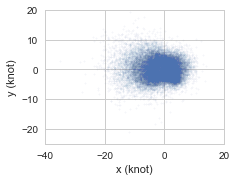

In [38]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [39]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [40]:
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    title ='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) 
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAM0AAAB6CAYAAAAcc9ekAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEXtJREFUeJzt3XtQVHX/B/D3AqLERSASmxp8QkRC5eINiYSfWQOGJN4J
yUaShLGEnBzwAl5YU9SccRxRSBkNvPEgWDPmvYRnJCgQM9HURUVTEBCQXe6Xz+8P88TKsnDksix+
XjPMeL7nC+e9i2/27NmzeyRERGCMdZqOpgMwpm24NIyJxKVhTCQuDWMicWkYE4lLw5hI/ao0jY2N
2LBhA1xcXODi4oItW7agubm52+YDgEKhgI+PDyorK9udExUVhZEjRyp9bdiwod35t27dwoIFC+Do
6Ahvb29kZGR0fGM78Nlnn7XJsG/fvnbn5+TkYObMmXBwcMDs2bPx559/CuvOnDmDlStXvnCWmzdv
YvTo0cjOzlYaP3jwIDw9PeHs7Izg4GDcv39faf3Zs2fh5eUFBwcHLFy4EIWFhS+coVtRP7J582b6
4IMPKC8vjy5evEhubm60a9eubptPRBQdHU179uxRO8fPz49iY2OppKRE+JLL5Srn1tbWkru7O0VG
RpJMJqNdu3bRmDFj6O7dux3fYDUmT55MaWlpShlqampUzi0uLiZnZ2fasWMHyWQyWrduHbm4uNCT
J0+EObNnz6bs7GzROZqammjWrFlka2tLWVlZwnhKSgqNGjWKDh06RAUFBSSVSmnKlClCxvz8fBo9
ejQlJSXRzZs36csvvyRPT09qbGwUnaG79ZvS1NXVkaOjI507d04YS01NJVdXV2pubu7yfCKikpIS
cnJyosrKSrVZJk6cSOnp6Z3KnZaWRq6urtTQ0CCMBQQE0ObNmzv1/arI5XKytbUlmUzWqfk7d+4k
X19fYbmlpYWmTp1KiYmJSjkDAgJEZ9m9ezctWLCgTWmmT59O0dHRStv08vKi5ORkIiKKiIigpUuX
Cuurq6vJycmJfv75Z9EZulu/2T27fv06amtrMXHiRGFs/PjxePz4Me7du9fl+QBw9OhRODs7Y/Dg
we3mKC0tRWVlJd56661O5b506RKcnZ0xYMAAYWzChAnIy8vr1PerIpPJoKenBysrq07Nz8vLw4QJ
E4RliUSCcePGKWWYMmUK8vLycOPGjU7nuHXrFg4cOID169e3WXf//n2MHTtWaZsjR47EpUuXVGZ6
5ZVXMGrUKFy+fLnT2+8p/aY0jx49goGBAYyNjYWx1157DQBQXFzc5fkAcOHCBUyePFltDplMBolE
gu+++w4eHh748MMPkZCQgJaWFpXzS0pKMGTIEKUxCwsLPHr0SO12OspgZGSEiIgIvPvuu5gxYwbS
0tLand+ZDIMHD8aYMWOQnp7eqQzNzc2IiIhAaGgohg4d2ma9hYVFm/v54cOHKC8vB/D096MqU3u/
m97Ub0pTW1uLgQMHKo3p6+sDABoaGro8v7m5GdeuXYONjY3aHLdv34aOjg6srKwQHx+PwMBA7Nq1
C3v37hWVW1WGziooKEBdXR1cXV2xd+9e+Pr6IjIyEidOnOhSBhsbG1y9erVTGfbu3QsjIyPMnz9f
5XofHx/s27cPV65cQVNTE5KTk5Gfn4/GxkYAQF1dXbffL91FT9MBusugQYPa3KHPlg0MDLo8v7Ky
Es3NzTAzMxPGFi9ejNzcXGH5xIkT8Pf3h7e3N0xNTQEAI0eOxJMnT7B//358/vnnnc4xaNAglbfT
29sbDx8+FJZV7cZ9/fXXCA4OFnYj7ezscP/+fSQmJsLb2/uFM5iamuL27dsqc7Umk8mQkJCAlJQU
SCQSlXOCg4NRXFwMPz8/AMA777wDX19fyOVytZlU/W56W78pzdChQ1FTUwOFQgEjIyMAT59fAICl
pWWX5z/75bfezdq4cSPq6uqE5SFDhkAikQiFecbGxgZlZWVobm6Grq6u0jpLS0thu8+UlpaqzAAA
8fHxaGpqUrnuGV1d3TbPu4YPH44LFy6onN/ZDM3NzdDR6Xjn5NSpU5DL5fjoo4+UxoOCguDr64sN
GzZg4MCB2LRpE6KiolBbWwtzc3OEhobizTffVJup9fMcTek3u2d2dnYwMDBQ+sufk5MDCwsLlU+I
xc43MzODnp4eKioqhDFLS0sMGzZM+NLT08PGjRuxaNEipe+9evUq/vOf/7QpDAA4OzsjLy9PqQg5
OTlwdnZWeTvfeOMNpW2q8sUXX2D16tVKY/n5+bC2tlY539nZGTk5OcIyEQkHKFqrqKgQnvepExAQ
gJMnT+L48eM4fvw4Dh8+DACQSqUIDQ0FAGzbtg0HDx6EgYEBzM3NUVtbi6ysLLi6uqrMVFNTg2vX
rrV7v/QqTR++607R0dH03nvvUU5ODmVmZpKbm5vSayoVFRVUUVHR6fnPmzNnDsXFxanNkJWVRXZ2
dhQXF0eFhYWUlpZGTk5O9MMPPxDR09ctSkpKqLa2loiIFAoFubm5UUREBMlkMoqNjSUHBwe6d+/e
C98PaWlpZG9vTykpKVRYWEj79++nUaNG0e+//05ERPX19VRSUkL19fVERFRUVESOjo707bffkkwm
o/Xr19OkSZOoqqpK6efOnDmTEhISiOjp60slJSXU1NTUYR6FQtHmkHNSUhK5urpSdnY2yWQyCgoK
ovnz51NLSwsREV25coXs7e1p//79wus006ZN69T2epqESHNvQmv9V747NDQ04MCBA8jKysKAAQPg
7u4OPz8/YZciOjoaABAZGdmp+c9LTU3FrVu3EB4erjbHb7/9htTUVBQVFcHMzAw+Pj6YOnUqgKe7
GKGhoViyZAk8PDwAAHfv3kVCQgIKCwthaWmJgIAAODg4dOm+OHfuHE6ePImysjJYWlpi7ty5wq7N
tWvXIJVKsWbNGtjb2wN4+mj4/fff49GjR7CyssKiRYuUHplqamqwZMkSbNmyBa+//jrS09MRFxeH
HTt2dPjoU1dXh8DAQKXttbS0IDk5Genp6WhsbISTkxM+/fRTpaOZmZmZSE5ORmVlJUaMGIHFixe3
u9vaE8aNG6d6hSYbm5OTo8nNi1ZcXEyOjo5UWlpKRNqXvzWx2Y8cOUILFy5UGgsKChLui97W0/e9
up/fb57T9AZLS0vMnDkTR48e1XSUXkVEOHz4MEJCQoSxS5cuQUdHBxYWFhpMphlcGpGWL1+On376
Se0Jm/3NqVOnYGtri0mTJgljDg4O2L17twZTaU6/OeTcW4yNjdt9kbC/mjZtGqZNm6Y0pqf38v7X
4UcaxkTi0jAmEpeGMZG4NIyJxKVhTCQuDWMicWkYE4lLw5hIXBrGROLSMCYSl4Yxkbg0jInUqdI8
fvwYHh4eKCgoQGFhIT7++GP4+/tj7dq1wnvmk5OTMWvWLMybNw+//PJLj4ZmTJM6LE1jYyOioqKE
TybZtGkTwsLCcOjQIRARzp8/j9LSUiQmJuLIkSPYt28ftm/f3ic+aoexntBhaWJiYuDn5yd8cFt+
fr7wqZTu7u7IzMzElStX4OzsDH19fRgbG8PKygp//fVXzyZnTEPUvikiNTUV5ubmmDx5MuLj4wE8
fRffs48zMjQ0hFwuh0KhUHpvt6GhIRQKRacCdPfnBPQ2bc6vzdkBzeVXW5pjx45BIpHg119/xfXr
1xEeHi58bCgAVFdXw8TEBEZGRqiurlYab10iddr98AItkJubq7X5tTk70PP51RVS7e7ZwYMHkZSU
hMTERLz99tuIiYmBu7u7cJ2RjIwMjB8/Hg4ODsjNzUV9fT3kcjkKCgpga2vbvbeCsT5C9HtWw8PD
ERkZie3bt8Pa2hqenp7Q1dXFJ598An9/fxARvvrqqzafw8tYf9Hp0iQmJgr/TkpKarN+3rx5mDdv
XvekYqwP4xc

## 2.3 Overview by Month

In [41]:
month_incre = 1
current_df = df.query('speed>=1')
for month in arange(1, 12+month_incre, month_incre): 
    end_month = month+month_incre
    sub_df = current_df.query('(month >= @month) and (month < @end_month)')
    if len(sub_df) > 0:
        if month_incre == 1:
            title = 'Month: %s' % (month)
        else:
            title = 'Month: %s - %s ' % (month, end_month-1)
        ax = WindroseAxes.from_ax()
        ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
        plt_configure(figsize=(3,3), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXl4VOXZ/z+zL5nJZLJM9p2QkLAqgkCsirIIKi611lr3
ra9FrdZWbfVHq3Wrvu6tta/WqrVVKSriWoWqICCyyJKQhOz7TJKZyez7+f0RZzQSICEnC5rvdeWC
mXPOc5Y53+e+n3uVCIIgMIEJTOCYgHSsL2ACE5jA4DFB2AlM4BjCBGEnMIFjCBOEncAEjiFMEHYC
EziGMEHYCUzgGMIEYb8HmPDcfXcwQdhRwMKFCykuLuaBBx4YcHtbWxvFxcUUFxdjtVpFPfdHH33E
qlWrYp+ffPJJZs2aJeo5XC4Xp556Ku+//76o407gYEwQdpQgkUj48MMPB9z2wQcfjNh5X3jhBcxm
84iN73K5uP7662lvbx+xc0zga0wQdpQwa9YsWltbqaysPGjb+++/T3Fx8Rhc1fCwbds2LrjgAqqq
qsb6Ur43mCDsKGHKlClkZ2cfJE3b29vZu3cvS5cuPeiYDz/8kPPPP5+ZM2dy8skn89hjjxEKhWLb
Fy5cyP/93/+xatUq5syZw3HHHcdtt92Gy+UC4JJLLmHbtm18/PHHFBcX09raGjv23XffZcmSJUyb
No3zzjuPnTt3xra1trZSXFzMk08+edh7+vnPf87kyZN59tlnj+qZTGDomCDsKGLx4sUHqcUffPAB
M2bMIC0trd/3r776KitXrmT69Ok89dRT/PSnP+Vvf/sbt99+e7/9nnnmGRwOB4888gi/+MUveOed
d3j66acBWLVqFaWlpRx33HG8+uqrmEwmALxeL48++ig33ngjjz/+OF6vlxtuuCE2GZhMJl599VUu
uOCCw97Pyy+/zOOPP05iYuKwnssEBg/5WF/A9wlLly7lueeeo66ujsLCQqBPHT7jjDP67RcOh3ns
scdYvnx5zGBUXl6OXq9n1apVXH311ZSUlACQlpbGI488gkQioby8nE8++YRnn32WOXPmcPLJJ6PT
6dBqtdxyyy28+OKLQJ/V+KGHHmLmzJkAhEIhbrjhBmpraykpKUGpVMa2HQ6TJ08W7dlMYHCYkLCj
iGnTppGens5//vMfADo6OtizZw9Llizpt199fT1Wq/UgNXn58uUAbN++vd+YEokk9jklJQXok65O
p3PA65DJZEyfPj32OTMzE+CQ+09g/GCCsKMIiUTSTy3+4IMPmD59Ounp6f326+3tBSApKanf93q9
HqVSGVujAmg0moPOIZPJKC8v5/777x/wOlQqFVLp1z999P+RSOQo72wCo4UJwo4yFi9eTEVFBa2t
rXzwwQcHqcMACQkJAPT09PT73uFwEAgEYtsPh9tvv50tW7Zgt9vFufAJjAtMEHaUcdxxx5GSksIr
r7zC7t27D1KHAfLz8zEajQcFIrz77ruxMY4EnU7HPffcQ2NjYz/L8gSObUwYnUYZUqmURYsW8fe/
/z22pv02ZDIZK1eu5J577sFgMHDaaadRXV3Nk08+ydKlSwdt7CkvLyclJYVdu3ah0Wjw+/2DOi4Q
CFBZWUlaWtpB1usJjC0mJOwYYPHixQSDwQF9r1H89Kc/5d577+Xzzz/nZz/7GS+//DJXXHEFDz/8
8JDOdffdd+P1eunu7qa2tnZQx1gsFi688EJWr149pHNNYOQhmajp9N1Ca2srl156KRs2bIh9t2nT
Jq666irWr19PVlbWGF7dBIaLCcJOYALHECZU4glM4BjCBGEnMIFjCBOEncAEjiFMuHW+A4hEIoTD
4VhlCUEQYv+XSCT9/mQyWb9QxrHA2rVr+etf/wrAD37wA2677bZ+27ds2cKDDz5IOBwmMzOTBx98
EIPBMBaXOu4wYXQaxxAEgWAwSCAQIBgMxv78fn/su1AoNOSQQplMhkKhQKFQoFQqUSqVsc8KhQKV
SoVcPjJzudfr5eSTT+a9997DYDBw0UUXcfPNNzN//nygL/Hh1FNP5fnnn6ewsJCHH34YqVTKLbfc
MiLXc6xhQsKOEwiCQCAQwOPx4Ha7cbvdeDweIpEIUqk09ieXy5HL5Wg0GgwGAyqVKka6KMmkUinh
cJgvv/ySmTNnIpFIEASBUChEIBDA7/fHSB89Z5T4kUgEQRBQKBRotdpYto9WqxWFxOFwmEgkgs/n
Q6fTEQ6HUalUse0ymYz169ejUCgIBAKYzeZjMrl/pDBB2DFCKBTC6XQeRE65XI5CoUCj0ZCUlITB
YEChUAzrXNHgfplMhkqlQq/XH3JfQRDwer309vbidrvp7u4mGAwSiUT6kTguLg6dTjdk9Vqn03HT
TTdxxhlnoNFoOOGEEw4KtVQoFOzfv58rr7wShUIxIV2/gQmVeBTh9/ux2+3YbDbcbndMNdVqtRgM
BgwGAzKZTJRzfVPCijFmIBDAZrPhcDjw+XwEg0EkEgkGg4GEhIRBX3tVVRW33347zz33HHq9nltv
vZXp06dz9dVXD7j/P//5T9566y1eeeWVYd/DdwETEnYEIQgCHo8Hm82G3W7H7/ejUCjQ6XRkZmYe
VtKNNyiVSlJTU0lNTQX6DF1Wq5Wenh6am5sJh8PExcWRmJgYU9UHwqZNm5g3b14sdfC8887jn//8
Z4ywHo+HrVu3snDhQgDOOeccHnrooVG4w2MDE4QVGYIgxFRJu91OJBJBpVKRkJBAamrqsNXb8QKp
VEpycjLJyckAuN1uLBYLnZ2dtLS0oFKpMBqNpKSkoFQqY8eVlJTw4IMPsnLlSrRaLRs2bKCsrCy2
XS6Xc+edd/L8889TXFzMO++8w+zZs0f9/sYrJggrEsLhMDabDbPZjN/vR6VSkZaWhslk6pcs/l1F
XFwc+fn5QJ/qbzab6enpobOzE4PBgMlkQq/XU15eTmVlJeeddx5KpZKpU6dy7bXX8tvf/paFCxdy
2mmn8cgjj3D77bcTiURIS0vjD3/4wxjf3fjBxBp2mPD5fFgsFrq7u5FKpSQkJJCZmTnmklTsNezR
wuVy0dbWhtvtRi6Xk5qaSlJS0oi5jb7rmHhqRwFBELDb7ZjNZtxuN2q1mtzcXBITE8c8KGG8QafT
UVxcTDgcpqOjg87OTtra2khMTMRkMqHVasf6Eo8pTEjYIUAQBKxWK21tbYTDYXQ6HdnZ2ajV6rG+
tIMwXiTsQLDZbLS3t8d8sVlZWcTFxY31ZR0TmJCwg4AgCDgcDlpaWggGgxiNRrKzs8cdEY4VGI1G
jEYjXq+XpqYmqqqqYkuJ8Tj5jSdMEPYIcLlctLS04PV6SUhIIDc3d4KoIkGj0VBSUoLX66WhoYGK
igqSkpLIyMjoZ1mewNeYIOwh4PV6aW1txel0otfrmTZt2pgbkr6r0Gg0lJaW4nK5aGxsZN++fZhM
JtLS0iaMU9/CxNP4FkKhEC0tLVitVrRaLVOmTDmo9u8ERgY6nY6pU6ditVppbW2lq6uL9PR0UlNT
J4x5X2GCsN+AzWajqakJqVRKUVER8fHxY31J30skJiaSmJhIe3s7HR0dWK1WCgoKJta3TBAW6JOq
TU1N9Pb2kpKSQmZm5vci2GG8IyMjA5PJRG1tLZWVlWRkZHzvpe33nrA2m43GxkYUCsWE+isiNmzY
wFNPPYXH46G8vJw777wzts1sNnPttdfGPrvdbsxmM59//vlBflm5XE5JSQnd3d2xpcr3Wdp+b/2w
35SqqampZGRkfKdm7rH0w7a0tPCTn/yE1atXk5SUxGWXXca1117LKaecctC+giBw9dVXs3jxYi68
8MLDjhsOh6mtrcXtdn9vpe240fuiTYQ/+eSTft8vXLiwXyPiYDDIrFmzsFqtse8uueQSzj///Njn
3t5eZs2aRSA

# 3. Create input data and configuration

In [42]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [43]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5
   6   7   8   9  10  11  12]


In [44]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 4. Kernel Density Estimation

In [45]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [46]:
%%time
from sklearn.grid_search import GridSearchCV
# from sklearn.model_selection import GridSearchCV  ## too slow

# The bandwidth value sometimes would be too radical
if knot_unit:
    bandwidth_range = arange(0.7,2,0.2)
else:
    bandwidth_range = arange(0.4,1,0.1)

# Grid search is unable to deal with too many data (a long time is needed)
if len(sample) > 50000:    
    df_resample=df.sample(n=50000, replace=True)
    bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
else:
    bandwidth_search_sample = sample

grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4) 

grid.fit(bandwidth_search_sample)
bandwidth = grid.best_params_['bandwidth']
print(bandwidth)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.7
Wall time: 1min 21s


In [47]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

kde = neighbors.KernelDensity(bandwidth=bandwidth, kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 0.7 625
[  1.75323162e-06   3.07138842e-06   2.42519722e-05   6.02241347e-05
   1.15292813e-04]


In [48]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(3.5,2.5))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuUI/V5NviUpJLUrb63+n5XzxBgyHDxZbCxvQaHxeY4
OzaMSZgPZoMh68zmhA+SfDF4D2NvgBCvbcg5jsGfIZc9Q3zGJHyxk2PW+WKM4y+EJTZzHJbL+Hh6
utWtVre61Wrd71W1fzRvzU+lKqmqVOqWmnrO4TDTo6r6SV316P297/M+LydJkgQbNmzY2Kdw7PUC
bNiwYaOZsEnOhg0b+xo2ydmwYWNfwyY5GzZs7GvYJGfDho19DZvkbNiwsa9hk5wNGzb2NWySs2HD
xr6GTXI2bNjY17BJzoYNG/saNsnZsGFjX8MmORs2bOxr2CRnw4aNfQ2b5GzYsLGvYZOcDRs29jVs
krNhw8a+hk1yNmzY2NewSc6GDRv7GjbJ2bBhY1/DJjkbNmzsa9gkZ8OGjX0Nm+Rs2LCxr2GTnA0b
NvY1bJKzYcPGvoZNcjZs2NjXcO31AmzsPSRJQrFYRLlchtPpBM/zcDgc4Dhur5dmw0bD4CRJkvZ6
ETb2DoVCAYlEAt3d3SiVSgCAcDiM/v5+dHd3w+Fw2KRno61hR3LvYgiCgFwuh83NTfh8PpTLZfA8
D0mSIEkSBEFAuVxGsVgEx3FwOp026dloO9gk9y6EJEkol8sQBAEcx0EQBCwsLEAQBLhcLoiiiGw2
C4/HA5fr4i1CpFcoFOBwOOB0OuF0OuFyuWzSs9GysLer7zKIoohSqQT6ta+trSEWi2F6ehputxvF
YhHr6+vgOA6lUgkulwudnZ3o6OhAZ2cnnE5nxfnoPBzHyWTncrmqXmfDxl7BjuTeJaDtpyAIAIBy
uYxQKARRFMHzPLq7u1EsFuH1esHzPHp7e+Hz+VAoFJDNZpFIJBCJRGTSI+JjyaxcLkOSJBQKBZv0
bLQMbJJ7F0AURZTLZYiiCI7jkEqlsLq6ioGBAfT09GB5ebni9RzHQZIkcBwHr9cLr9eLgYEBSJKE
fD6PXC6HeDyO9fV18DwvE14t0nM4dtRKpVIJPT09NunZ2DXYJLfPQXk0Kiasr68jmUxiampKjtT0
Ziw4jpPJjCW9bDaLeDyOtbU1uN3uiu0tkZskScjlctjY2JALGPR/O9Kz0UzYJLdPodyeFotFrKys
wO12Y35+Xi4oNFIsYEkP2IkYKdLb3t7G2toaPB6PTHh0DEWKykjPJj0bzYBNcvsQyu3p9vY21tfX
MTw8jIGBgSpiU0ZyREJG4XA45Hzd4OCgTHrZbBaxWAz5fB4AEI1GZXJkIz2b9Gw0AzbJ7TOw21NR
FLG2toZcLoe5uTl4vd6q1zdT9sGSHgBkMhlsbGwAALa2tlAoFOD1euVIz+v12qRnw3LYJLdPIEkS
IpEIOjs74fF4kM/nsbKyAp/Ph/n5eZk8tI4Fmkt4wA7pORwO+P1+ADsRZy6XQzabRTQalUmPcnp6
Sc/tdtsaPRuasEluH4C0b9vb23C5XEilUtjc3MT4+Dh6e3trHqtGDma3q/WgvJbD4YDP54PP5wNw
sQODujCKxaK8raVIj86hJL1isQhBENDf3w+e523SsyHDJrk2B3UuEGg7OD8/D7fbrescraIHdzqd
6OrqQldXF4CLpJfNZrGxsYFSqVQV6RGZUcGjo6MD+Xy+oiPDJr13N2ySa1MoW7PS6TRyuRy6u7sx
NTWl+6HWel0rEF8t0otEIiiXyzLpEdErI71SqWST3rscNsm1IdjiAgBEIhFsb2/D6/Wir6+v4Qe4
VQlASXrlclkmvXQ6LUtmKNLzeDw26dmwSa6doNS+lUolhEIhcByH+fl5hMNhw+dsVv5tN+ByudDd
3Y3u7m54PB7kcjl0dXXJ4mRBEOR8XmdnZ0WBgiU9KmQQ8dmkt79gk1ybQKl9SyaTWF1dhd/vh9/v
rxDZWoF2JD6HwyGTHrAT6WWzWbkNjY3ylKQniqJcwGFJz+VyweVy2aTXxrBJrg0gCIJsaClJEtbW
1pBKpTAzMyNr0ABzURnbp8r+rN2g9r5dLhd6enrQ09MDYCfype1tPB6HKIoVkR4bwbGkVyqVkEql
MDIyYpNeG8ImuRaGsrhA2jev14sDBw7YglgF6hEPz/Pgeb6C9CjSi8VikCSpItIj0qOIkLa3HMfZ
kV4bwSa5FgW7PQWAWCyGSCSCkZER9Pf3W6Zvo/Mkk0kkEgl0dHTIzfz7HWQp1dvbC0mSKiK9WCwG
AOjo6JCNRNmIl430bNJrbdgk14LY3t6G0+mEx+OBKIoIh8PI5/OarVkEMyRHJLq2tobe3l6k02lk
Mhk4HA6USiV5K7ffo0aO4+B2u+F2uytIL5vNIpVKoVAoYHFxUTXSA2zSa2XYJNdCoO1pNBpFT08P
BEHAysoKuru767ZmmQE5kwBAIBCQCZIExTzPI5lMIhKJgOd5+eFW+sa1AqyOPFnS43kesVgMIyMj
yGazyGQyiEajcDgcFZ+JFukBqJiP4XQ6bdLbRdgk1yJgtW9UPc1kMrpaswhGIjmqzg4NDSGXy8Hp
dKJcLgOAPK+hv78f/f39Fb5xrIUSRXlsj+leolnEIUmS3CPrdrvR19cnj3EkjR755LGFDDaCs0lv
72CT3B5DqX0TBEHeLhppzQL0kZwoiohEIkgmk3J1dmNjo+ZxrG+c0kJJ2Viv7DHdr+A4Dh6PBx6P
R/4iINJLpVIy6bFW8Vqkt7m5ib6+Pvh8PtlhZb9/frsJm+T2EFq25C6XC319fYYITg9oe+pyuRqq
ziotlGi6Fzn/sj2m5IrSzg+tUmKjBjXSKxQKyOVy8pbf5XJVbG+J9PL5vFy5LRaLAFA1H6OdP7+9
hk1yewRla9b6+jri8TgmJyeRTCZN3dS1IrlEIoFwOIyhoSEMDg5W6eLoQWb/rxcOh6OqxzSbzSKb
zWJ9fR3lcllO1CurlO0AM/k+dj4GS3pqQ4HYKjp9LhTdK2fe2qRnHDbJ7TKU2rdSqVQRXZFVktkH
S3mcKIpYX19XFQ83C06nU7XzIJVKoVQq4cKFC3KUR+TXKJpNnFb0A2sNBRIEQZ6PoSzu2KTXOGyS
20Uot6da0VUj7VnscYVCQZ7rUG972kxdHHUeeDwelEolTExMyJFeNBoFx3EVpMcOtG4FNINA2Txn
MpnE6OgoJEnSHApkk555tNbdtI/B+r5JkoRwOIxMJoPZ2Vl5EAzBLMmxxxGBas11UB6n/Dttn5oB
pQhXWaVkc1fvBo0eW73VOxSI5mPYpFcfNsk1GVqtWR0dHZifn1d9gBshOUEQEA6HkUqlVAm01jr3
4kHQStizuSua7co+3Grrbxaa/dmonV/PUCCS8bBDgVjSK5fLKBaLCIfDmJiYAM/z70rSs0muiWAb
64Gd4S0bGxsYHR1Ff3+/5nFmIylBEBCPx+Hz+QxVT1vphtfKXak93EqNXiu9DyPQQ6JqFW36XOoN
BaK8H0XNbKTH83wFOe5H2CTXBJD27c0338SBAwcAAOFwGMViEYFAAB6Pp+bxZiK5RCKBra0tdHZ2
GnIGZtdsRU7Qaqhp9GgOBGn0qN+W5/mmRF17EcnVgxrpqQ0F6ujoqKrcApWR3n4nPZvkLIaysT6T
yWB9fR09PT2YnJzU1RlghGSoeppOp2USMHqDttMNrTX8ZmtrC5lMBgsLC5pGmfsZys+FJT0AuHDh
Qk3BthrpOZ1OWa/Xzp+hTXIWQql9o+b6iYkJ2d5HL/SQHFs9nZ+fRyKRQC6XM7V25fVaJZKrB7JE
z+fz4DgOvb29FZ5xZJSp5hmnF60YydUDkV5HRwfi8TgCgYAcAW9sbNSchAZcvJeVVvHtSHo2yVkA
2p6Wy2XZfyw

In [49]:
kde_cdf = cdf_from_pdf(kde_result)

# 5. GMM by Expectation-maximization

In [50]:
sample= SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [51]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.499   1.928  -0.748  2.232  2.162  -0.077
2  0.264  -3.994  -0.585  3.399  3.215   0.315
3  0.237  -4.814   1.945  6.259  3.761   0.037

GMM Plot Result
0.49894287172 [[ 1.92804623 -0.74776635]] [ 2.10370223  2.28727599] -123.885295177
0.264029083066 [[-3.99359868 -0.58532644]] [ 2.72829546  3.80058901] -50.0121680074
0.237028045214 [[-4.8139851   1.94498738]] [ 3.75711339  6.26118233] -88.0266187571


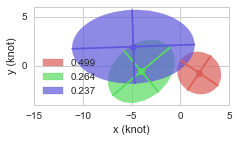

In [52]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [53]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmQLHd9J/jJuqururv6vu8nhCROSUhMgNBai0Igg7HA
Ywy2Y8QwOxteFsxhQELnIj2DwAjvWlgzyAxMSIqVNApHgELMRiwg0BqDDp5FjCUheN3v9VnVXfd9
Zub+0fpm/yor78qqrmrlJ0Kh915VZv6y6pef+p6fLyeKoggHDhw4OKFwHfcCHDhw4KCTcEjOgQMH
JxoOyTlw4OBEwyE5Bw4cnGg4JOfAgYMTDYfkHDhwcKLhkJwDBw5ONBySc+DAwYmGQ3IOHDg40XBI
zoEDBycaDsk5cODgRMMhOQcOHJxoOCTnwIGDEw2H5Bw4cHCi4ZCcAwcOTjQcknPgwMGJhkNyDhw4
ONFwSM6BAwcnGg7JOXDg4ETDITkHDhycaDgk58CBgxMNh+QcOHBwouGQnAMHDk40HJJz4MDBiYZD
cg4cODjR8Bz3AhwcP0RRRK1WQ6PRgNvthtfrhcvlAsdxx700Bw7aBieKonjci3BwfKhWq8hmsxgc
HES9XgcA7O3tYWRkBIODg3C5XA7pOehrOJbcaxg8z6NcLiMejyMUCqHRaMDr9UIURYiiCJ7n0Wg0
UKvVwHEc3G63Q3oO+g4Oyb0GIYoiGo0GeJ4Hx3HgeR7r6+vgeR4ejweCIKBUKsHv98PjOdoiRHrV
ahUulwtutxtutxsej8chPQc9C8ddfY1BEATU63XQ1x6NRpFKpbC4uAifz4darYZYLAaO41Cv1+Hx
eDAwMIBgMIiBgQG43e6m89F5OI6TyM7j8bS8z4GD44Jjyb1GQO4nz/MAgEajgZ2dHQiCAK/Xi8HB
QdRqNQQCAXi9XgwPDyMUCqFaraJUKiGbzWJ/f18iPSI+lswajQZEUUS1WnVIz0HPwCG51wAEQUCj
0YAgCOA4Dvl8Hru7uxgdHcXQ0BC2traa3s9xHERRBMdxCAQCCAQCGB0dhSiKqFQqKJfLyGQyiMVi
8Hq9EuFpkZ7LdVitVK/XMTQ05JCeg67BIbkTDoqjUTIhFoshl8thYWFBstSMRiw4jpPIjCW9UqmE
TCaDaDQKn8/X5N4SuYmiiHK5jIODAymBQf93LD0HnYRDcicUcve0Vqthe3sbPp8Pa2trUkKhnWQB
S3rAocVIll46nUY0GoXf75cIj44hS1Fu6Tmk56ATcEjuBELunqbTacRiMUxOTmJ0dLSF2OSWHJGQ
WbhcLileNzY2JpFeqVRCKpVCpVIBACQSCYkcWUvPIT0HnYBDcicMrHsqCAKi0SjK5TJWVlYQCARa
3t/Jsg+W9ACgWCzi4OAAAJBMJlGtVhEIBCRLLxAIOKTnwHY4JHdCIIoi9vf3MTAwAL/fj0qlgu3t
bYRCIaytrUnkoXYs0FnCAw5Jz+VyYXx8HMChxVkul1EqlZBIJCTSo5ieUdLz+XxOjZ4DVTgkdwJA
tW/pdBoejwf5fB7xeByzs7MYHh7WPFaJHKy6q3qQX8vlciEUCiEUCgE46sCgLoxarSa5tWTp0Tnk
pFer1cDzPEZGRuD1eh3ScyDBIbk+B3UuEMgdXFtbg8/nM3SOXqkHd7vdCIfDCIfDAI5Ir1Qq4eDg
APV6vcXSIzKjhEcwGESlUmnqyHBI77UNh+T6FPLWrEKhgHK5jMHBQSwsLBh+qNXe1wvEp0V6+/v7
aDQaEukR0cstvXq97pDeaxwOyfUh2OQCAOzv7yOdTiMQCCASibT9APcqAchJr9FoSKRXKBSkkhmy
9Px+v0N6DhyS6yfIa9/q9Tp2dnbAcRzW1tawt7dn+pydir91Ax6PB4ODgxgcHITf70e5XEY4HJaK
k3mel+J5AwMDTQkKlvQokUHE55DeyYJDcn0Cee1bLpfD7u4uxsfHMT4+3lRkawf6kfhcLpdEesCh
pVcqlaQ2NNbKk5OeIAhSAoclPY/HA4/H45BeH8MhuT4Az/OSoKUoiohGo8jn81haWpJq0ABrVhkd
UywWkc1mpe6FfoPSfXs8HgwNDWFoaAjAoeVL7m0mk4EgCE2WHmvBsaRXr9eRz+cxNTXlkF4fwiG5
HoY8uUC1b4FAAKdOnbKlIJbIYWdnB0NDQ8hkMiiVSvB4PJK7x3Ym9DL0iMfr9cLr9TaRHll6qVQK
oig2WXpEemQRknvLcZxj6fURHJLrUbDuKQCkUins7+9jamoKIyMjttS31et1bG9vAwBWV1elfz84
OJCuy3YmkMXDlm70M0hSanh4GKIoNll6qVQKABAMBiUhUVJmAZotPYf0ehsOyfUg0uk03G43/H4/
BEHA3t4eKpWKamsWwQzJsXJLpVIJXq9Xcok5joPP58Po6CiA5s4Eeb0adVj0+0NN9+zz+ZpIr1Qq
IZ/Po1qt4ty5c4qWHuCQXi/DIbkeArmniUQCQ0ND4Hke29vbGBwc1G3NMnON/f19ZDIZzM/PIxwO
Ix6Pa5KjUmcCuXmxWAyNRkM1i9kt2J0oYUnP6/UilUphamoKpVIJxWIRiUQCLpdLuu9gMKhKegCa
5mO43W6H9LoIh+R6BGztG2VPi8WiodYsgp4lR+6py+XCqVOnmuY3mDmP2+1WzGKyAX01i6eT6NQ1
RFGUemR9Ph8ikYg0xpFq9EgnjyV71oJzSO/44JDcMUNe+8bzPIrFIlwul6nWLECbnMg9HRsbk0pO
jBxnBEpZTCK9ZDIJjuOkh74fS1OUwHEc/H4//H4/RkZGmkgvn89LpMdKxauRXjweRyQSQSgUkhRW
HNKzDw7JHSPUZMk9Hg8ikYgpglMDuafZbFZSA+40lAL69PDXajUptsU+/L0MNuGgBiXSq1arKJfL
yOVy0nwM1r0l0qtUKlLmtlarAUDLfAyH9Kyjt3fXCYa8NSsWi0lxslwuZ2lTyy0yUgN2u91NasBq
x8n/bwfY2FYgEEAsFsPMzAxKpVLTw682HKcXYOWzYOdjsKSnNBSIzaLT907WvXzmrUN65uGQXJch
r32jOJnH45HiZPl83vKDRccpdUT0CuQWDzsch50TQaRnJOFixNpqB3b0A6sNBeJ5Xrpv1tJjycwh
PetwSK6LkLun2WwWe3t7mJiYwNjYmLRR27GkSA04l8u1dERooRuxMrXaPnY4jpJkupp6cLfQCQJl
7zuXy2F6ehqiKKoOBXJIzzockusSWN03URSxt7eHYrGI5eXlllYqqyQnCILUmqXlnsohfyA4jpPc
p25DLpnO1uixQppKmnL9CjZ7a3QoEFm4DunpwyG5DkOtNYuISCn+ZIXkstksUqkUBgYGsLi4aHpT
d9rdswo19WBWUy4YDEIURSl7a/d9dPqzUTq/kaFAfr+/ydKTk16j0UCtVsPe3h7m5ubg9Xpfk6Tn
kFwHwTbWA4ctUgcHB5iensbIyIjqcWYsKUEQEIvFkM/npXYvsxu4nza8mqYcPfjFYlG16b5XYYRE
lSxcIj29oUAU96MyF9bS83q9TeR4EuGQXAdAtW8vvvgiTp06BQDY29tDrVbD6uoq/H6/5vFGLblq
tSrNUj116hTS6XQTqZpdsx0xwW6DNOWq1So4jsPQ0FBT0z2AFtIzi+Ow5PSg5dazQ4GCwWBL5hZo
tvROOuk5JGcz5I31xWIRsVgMQ0NDmJ+fNxQ0N0IylLRgZ6laJSc6rlar9XzNmh7UavTYViy2G6Pf
75cgd+tZ0gOAjY0NTZEFJdJzu91SvV4/k97J+IZ7BPLaN2qun5ubk7oBjEKNrMg9LRQKLUkLqyRH
iZBKpQKO46SNXavVbClIPi6wNXryVizqSjBSo9eLlpweiPSCwSAymQxWV1elSWgHBweak9CAo70s
l4rvR9JzSM4

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC3CAYAAAD+WNkeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHyFJREFUeJztnXtQU2f6x78hMV4AYS0KVIogokV+XqquuK2rlWrZOusW
FxVR2enq1Mp6qa1VvHGpgmhVOrPeOqXb3VVrpdKdVWd37LZqpdWxCi1UkYtSDV4AQaUGsESS8/sj
nkMSTnIScjk54fnMZCTnvOe8zzH55nkvz/s+MoZhGBAEIRm8xDaAIAjbINEShMQg0RKExCDREoTE
INEShMQg0RKExFCIbQBBSA2dTofMzExUVlZCqVQiKysLgwYN4s6fOnUKe/bsgUKhQEJCAubMmYPH
jx9j/fr1uH37NjQaDVJSUvDSSy9BpVJh7dq1kMlkiIyMREZGBry8BHwpQxCETXzxxRdMamoqwzAM
88MPPzBLlizhzmk0Gmbq1KlMU1MT09bWxvzxj39kGhoamIKCAiYrK4thGIZ58OABM3nyZIZhGOaN
N95gzp8/zzAMw6SlpTH/+9//BOun5jFB2EhxcTF++9vfAgBGjx6Ny5cvc+eqq6sRGhoKPz8/KJVK
jB07FhcvXsTvfvc7vPnmmwAAhmEgl8sBAGVlZRg/fjwAYNKkSTh37pxg/ZJsHhcXF4ttAuHmjB07
VrBMSclJaLX+vOeUSiVGjBjBe665uRk+Pj7ce7lcjvb2digUCjQ3N8PX15c75+3tjebmZnh7e3PX
rlixAitXrgSgF7BMJuPKqtVqQbslKVoAyN902uqyanUzfH19hAtKFE9/PsC2Z0xMn2JVOa3WHwND
t/Ceu12z3ux1Pj4+aGlp4d7rdDooFArecy0tLZyIa2trsXTpUsybNw8zZswAAKP+a0tLC/r27Sto
NzWPCcJGxowZg8LCQgBASUkJhg4dyp2LiIiASqVCU1MTNBoNioqK8Nxzz6GxsRELFy7E6tWrMWvW
LK788OHD8d133wEACgsLMW7cOMH6JetpCUIspk2bhrNnz2Lu3LlgGAZbtmzB8ePH0draisTERKxd
uxaLFi0CwzBISEhAYGAgsrKy8PDhQ+zduxd79+4FAOTl5SE1NRVpaWnIzc3F4MGDERcXJ1i/jGGk
t8qnuLiYmscGePrzAbY3j63p0xYXF1tsHltzDzGg5jFBSAwSLUFIDBItQUgMEi1BSAxRRFtaWork
5GQAgEqlQlJSEubNm4eMjAzodDoxTCIIyeBy0ebl5WHjxo1oa2sDAOTk5GDlypU4dOgQGIbByZMn
XW0SQUgKl8/ThoaGYteuXVizZg2AzrGXZ8+exbRp0wTvo1Y321SvreWlhqc/H9A9ntEaXC7auLg4
3Lp1i3vfldhLADbNS3r6PKanPx/QPZ7RWkSPiOpK7CVBOIp7v1wV2wSbEV20bOxlTEwMCgsLMWHC
BLFNIroRN/Ai7/Eg15phE6JP+aSmpmLXrl1ITEzE48ePrYq9JIjujCieNiQkBJ999hkAIDw8HAcP
HhTDDIKQJKJ7WoIgbINESxASg0RLEBKDREsQEoNESxASg0RLEBKDREsQEoNESxA2otPpkJ6ejsTE
RCQnJ0OlUhmdP3XqFBISEpCYmMjFI7AYLksFgHv37iElJQXz58/H3LlzUVNTI1i/6GGMBCE1vvrq
K2g0GuTn56OkpARbt27Fvn37AACPHz9GTk4OCgoK0Lt3byQlJSE2NhYBAQHIy8vDsWPH0Lt3b+5e
27dvx4wZMzB9+nScP38eP/30E0JDQy3WT56WIGykK2lBgI5lqYZ8//33qK+vx2uvvYbjx49zy1Qt
QaIlujWq1hrelyXMpQVhz/GlBQH0y1LZTAQst2/fRt++ffGPf/wDwcHByMvLE7SZmsdEt+Zn3fM2
X9PVtCB8+Pv7IzY2FgAQGxuL999/X7B+8rQEYSNdSQtijrFjx+LMmTMAgIsXL2LIkCGC9ZOnJQgb
6UpaEHOkpqZi48aNOHz4MHx8fLBz507B+km0BGEjXl5e2LRpk9GxiIgI7u/Y2FiuyWuK4bJUABg4
cCD+/ve/21a/TaUJghAdEi1BSAxqHovMtcZHRu+HBPQ2U5Ig9JBoXYypSCNGGEe/XLtkfo6QBE0A
JFqXICRUa8+ZE3Rgz67ZRUgTtxHtzJkzuSiTkJAQ5OTkiGyR/RiK1ZIYrYXvHtWXanCnFZC3ddRF
HtmzcQvRtrW1gWEYHDhwQGxTHAYrWEeI1RIRI0KhVqu5qJvqSzVGPxYkYM/DLURbUVGBR48eYeHC
hWhvb8fbb7+N0aNHW7zGXXP53GnV/xscEfCkXuvSnNgLW8+AsF8ZHa+sbuxU9uk+LjHJ4VAuHz1u
IdpevXph0aJFmD17Nm7cuIHXX38dJ06c6BRcbYi75fJhvZtc7nzvaoqhpzXFd3Tn49U8fWN398jO
+gwrH9byHn/ZLZTBj1uYFh4ejkGDBkEmkyE8PBz+/v5oaGhAcHCw2KZZhauawo7C1E7TJjXg/iJ2
FArdCLFNsBm3EG1BQQGqqqqQmZmJ+vp6NDc3o3///mKbJYijB5rEQkjE3UXAUsEtRDtr1iysW7cO
SUlJkMlk2LJli8WmsTvgKu9a1tQkWEar1ULe1IRof3+H1Gn4TKyASbjug1soQ6lUWrW6wV1wpmD5
RBox1HION7Vajbu1LbzX2itk9hnZOWISr/i4hWilhLMEayg4IZHywXdNdVWd0X3tEXDEiFDyum4C
idYGnCFYVlRdEaoQpvcsq6rj/u6KgEm47gGJ1kocLVhnitUchnV1VcAkXPGhpXlW4EjBljU1iSJY
UyKGBnH1G9pk1bVsP9dkmohwDeRpLeBosbKIKVZTWFsM+7/WeF7W4xKuh0RrBmcI1pFi/VHdEZ6o
1WohV7eZLTvSN0DwfqbitVa41y7VUDPZxVglWrVajZqaGnh5eSEkJMTilpCewLXGRw7tuzrLs0aG
DwBgOYwRAH68ftfovSURRwwNskm4AKh/62IsivbMmTP46KOPcO3aNQQFBUGhUKC2thYRERFYuHAh
Jk+e7Co7XYZUBGsLrLhZWBGbE68twu2OzWSdTofMzExUVlZCqVQiKysLgwYN4s6fOnUKe/bsgUKh
QEJCAubMmcOdKy0txY4dO7gVbeXl5di8eTPkcjmUSiW2bduGgADLLSOzol27di0CAgKQnp6OyMhI
o3NXr15FQUEBjh8/jh07dnTpwd0RRwnWHQaaLMGK2JJ4bfW43cnbOjKXT3Z2NtLS0hAVFYXDhw8j
Ly8P69ats1i/WdG+9dZbZvdrjYyMxLp161BXV8d7Xop0F8EaIiReVrhCSNnblt2v5z9h4eOzNpcP
AC6XzyuvvMLl8lmzZg1XPjc3FwMG6D8HrVaLnj2FtyExO+XDCnbz5s2dzqWmpuqfK8j9v5jW4Mgm
MSANwRrCiVfdee1txNAgm6aDpEaoLIz3ZQlH5vJhBfv999/j4MGDeO211wRtNutpN2zYgJs3b+Ly
5cu4evUqd7y9vd1lC7tdgaP7sM6GT1iOIDJ8AK5ev4sf1Y28zWWhZnJ3Gkl2ZC4fAPjvf/+Lffv2
4cMPP0S/fv0E6zcr2pSUFNy+fRvZ2dlYtmwZd1wulxvtpk4YY4uXNRSgNdMybHnTgSVrKW1t4P4e
1afz0kdzwrW2mdxdGDNmDE6fPo3p06dbzOXTp08fFBUVYdGiRWbvdfToUeTn5+PAgQPwt3K03qxo
Q0JCEBISgmPHjqGqqgoXLlxAe3s7YmJirL65uyOmlzUUoCUPZ1rWVgyF+mxIh1BLb/EL2JI9tkwD
eTKOyuWj1WqRnZ2N4OBgLF++HADw61//GitWrLBYv4xhGMZSgaNHj2LXrl2YOnUqdDodvvrqK/zl
L3/BrFmzuvj

## Goodness-of-fit Statistics

In [54]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.948  0.029      0.051  4.413006e-07      0.035       0.429

# 6. GMM by Optimization

In [55]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [56]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -15.758814713123712
     jac: array([  6.87428713e-01,  -2.38418579e-07,   3.57627869e-07,
         2.38418579e-07,  -1.19209290e-07,  -1.19209290e-07,
         6.87425017e-01,   4.76837158e-07,   3.57627869e-07,
         0.00000000e+00,   3.57627869e-07,   0.00000000e+00,
         6.87428713e-01,   0.00000000e+00,   1.19209290e-07,
         1.19209290e-07,   1.19209290e-07,   0.00000000e+00,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1687
     nit: 83
    njev: 83
  status: 0
 success: True
       x: array([ 0.11555615,  0.9283853 , -0.07450164,  2.05073704,  1.61659019,
        0.44224838,  0.175232  ,  2.73774064, -1.89303041,  1.3175924 ,
        1.35885988, -0.05841041,  0.70921185, -1.83446419,  0.30115834,
        4.94554499,  3.54161939,  0.10208762])

## 6.1 GMM Result

In [57]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.709  -1.834   0.301  4.946  3.542   0.102
2  0.175   2.738  -1.893  1.318  1.359  -0.058
3  0.116   0.928  -0.075  2.051  1.617   0.442

GMM Plot Result
0.709211852928 [[-1.83446419  0.30115834]] [ 3.5043575   4.97201786] -81.6469067896
0.175231995805 [[ 2.73774064 -1.89303041]] [ 1.29344877  1.38186114] -148.918595509
0.115556151267 [[ 0.9283853  -0.07450164]] [ 1.31951349  2.25339087] -59.2504359635


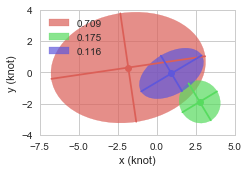

In [58]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Goodness-of-fit statistics

In [59]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.983  0.019      0.048  1.432299e-07      0.020       0.244

In [60]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuUI+V5PviU7mr1vdX3Vl/UDAvMeLj4AjY2G3BYHI5z
xsZjEubAJFyy3jlZEzgnicG7YP8CxPHagZxjGzYGJ/mdIT5jEhI7+Zl1NsEk3rVZbDNrEwbG6+l7
t1rqltSt+7Wq9o/2W/OpVCVVlUpqqannHM4w06qqT+qqR+/3vs/7vJwoiiIsWLBg4YDCtt8LsGDB
goVmwiI5CxYsHGhYJGfBgoUDDYvkLFiwcKBhkZwFCxYONCySs2DBwoGGRXIWLFg40LBIzoIFCwca
FslZsGDhQMMiOQsWLBxoWCRnwYKFAw2L5CxYsHCgYZGcBQsWDjQskrNgwcKBhkVyFixYONCwSM6C
BQsHGhbJWbBg4UDDIjkLFiwcaFgkZ8GChQMNi+QsWLBwoGGRnAULFg40LJKzYMHCgYZFchYsWDjQ
sEjOggULBxoWyVmwYOFAw7HfC7Cw/xBFEcViEeVyGXa7HU6nEzabDRzH7ffSLFhoGJwoiuJ+L8LC
/qFQKCCRSKCnpwelUgkAEAqFMDAwgJ6eHthsNov0LHQ0rEjuHQye55HL5bC9vQ2fz4dyuQyn0wlR
FCGKInieR7lcRrFYBMdxsNvtFulZ6DhYJPcOhCiKKJfL4HkeHMeB53ksLCyA53k4HA4IgoBsNgu3
2w2H4+ItQqRXKBRgs9lgt9tht9vhcDgs0rPQtrC2q+8wCIKAUqkE+rVvbm4iHo9jenoaLpcLxWIR
4XAYHMehVCrB4XCgq6sLXq8XXV1dsNvtFeej83AcJ5Gdw+Goep0FC/sFK5J7h4C2nzzPAwDK5TLW
19chCAKcTid6enpQLBbh8XjgdDrR19cHn8+HQqGAbDaLRCKBSCQikR4RH0tm5XIZoiiiUChYpGeh
bWCR3DsAgiCgXC5DEARwHIdUKoWNjQ0MDg6it7cXq6urFa/nOA6iKILjOHg8Hng8HgwODkIUReTz
eeRyOezu7iIcDsPpdEqEV4v0bLY9tVKpVEJvb69FehZaBovkDjgoj0bFhHA4jGQyiUAgIEVqWjMW
HMdJZMaSXjabxe7uLjY3N+FyuSq2t0Ruoigil8tha2tLKmDQn1akZ6GZsEjugEK+PS0Wi1hbW4PL
5cL8/LxUUGikWMCSHrAXMVKkt7Ozg83NTbjdbonw6BiKFOWRnkV6FpoBi+QOIOTb052dHYTDYYyM
jGBwcLCK2OSRHJGQXthsNilfNzQ0JJFeNptFPB5HPp8HAESjUYkc2UjPIj0LzYBFcgcM7PZUEARs
bm4il8thbm4OHo+n6vXNlH2wpAcAmUwGW1tbAIBYLIZCoQCPxyNFeh6PxyI9C6bDIrkDAlEUEYlE
0NXVBbfbjXw+j7W1Nfh8PszPz0vkoXYs0FzCA/ZIz2azwe/3A9iLOHO5HLLZLKLRqER6lNPTSnou
l8vS6FlQhUVyBwCkfdvZ2YHD4UAqlcL29jYmJibQ19dX81glcjC6Xa0H+bVsNht8Ph98Ph+Aix0Y
1IVRLBalbS1FenQOOekVi0XwPI+BgQE4nU6L9CxIsEiuw0GdCwTaDs7Pz8Plcmk6R7vowe12O7q7
u9Hd3Q3gIulls1lsbW2hVCpVRXpEZlTw8Hq9yOfzFR0ZFum9s2GRXIdC3pqVTqeRy+XQ09ODQCCg
+aFWe107EF8t0otEIiiXyxLpEdHLI71SqWSR3jscFsl1INjiAgBEIhHs7OzA4/Ggv7+/4Qe4XQlA
TnrlclkivXQ6LUlmKNJzu90W6VmwSK6TINe+lUolrK+vg+M4zM/PIxQK6T5ns/JvrYDD4UBPTw96
enrgdruRy+XQ3d0tiZN5npfyeV1dXRUFCpb0qJBBxGeR3sGCRXIdArn2LZlMYmNjA36/H36/v0Jk
awY6kfhsNptEesBepJfNZqU2NDbKk5OeIAhSAYclPYfDAYfDYZFeB8MiuQ4Az/OSoaUoitjc3EQq
lcLMzIykQQOMRWVsnyr7b50GpfftcDjQ29uL3t5eAHuRL21vd3d3IQhCRaTHRnAs6ZVKJaRSKYyO
jlqk14GwSK6NIS8ukPbN4/HgkksusQSxMtQjHqfTCafTWUF6FOnF43GIolgR6RHpUURI21uO46xI
r4NgkVybgt2eAkA8HkckEsHo6CgGBgZM07fReZLJJBKJBLxer9TMf9BBllJ9fX0QRbEi0ovH4wAA
r9crGYmyES8b6Vmk196wSK4NsbOzA7vdDrfbDUEQEAqFkM/nVVuzCEZIjkh0c3MTfX19SKfTyGQy
sNlsKJVK0lbuoEeNHMfB5XLB5XJVkF42m0UqlUKhUMDS0pJipAdYpNfOsEiujUDb02g0it7eXvA8
j7W1NfT09NRtzTICciYBgGAwKBEkCYqdTieSySQikQicTqf0cMt949oBZkeeLOk5nU7E43GMjo4i
m80ik8kgGo3CZrNVfCZqpAegYj6G3W63SK+FsEiuTcBq36h6mslkNLVmEfREclSdHR4eRi6Xg91u
R7lcBgBpXsPAwAAGBgYqfONYCyWK8tge0/1Es4hDFEWpR9blcqG/v18a40gaPfLJYwsZbARnkd7+
wSK5fYZc+8bzvLRd1NOaBWgjOUEQEIlEkEwmpers1tZWzeNY3zi5hZK8sV7eY3pQwXEc3G433G63
9EVApJdKpSTSY63i1Uhve3sb/f398Pl8ksPKQf/8WgmL5PYRarbkDocD/f39ughOC2h76nA4GqrO
yi2UaLoXOf+yPabkitLJD61cYqMEJdIrFArI5XLSlt/hcFRsb4n08vm8VLktFosAUDUfo5M/v/2G
RXL7BHlrVjgcxu7uLqamppBMJg3d1LUiuUQigVAohOHhYQwNDVXp4uhBZv/UCpvNVtVjms1mkc1m
EQ6HUS6XpUS9vErZCTCS72PnY7CkpzQUiK2i0+dC0b185q1FevphkVyLIde+lUqliuiKrJKMPljy
4wRBQDgcVhQPNwt2u12x8yCVSqFUKmFxcVGK8oj8GkWzidOMfmC1oUA8z0vzMeTFHYv0GodFci2E
fHuqFl010p7FHlcoFKS5DvW2p83UxVHngdvtRqlUwuTkpBTpRaNRcBxXQXrsQOt2QDMIlM1zJpNJ
jI2NQRRF1aFAFukZR3vdTQcYrO+bKIoIhULIZDKYnZ2VBsEQjJIcexwRqNpcB/lx8r/T9qkZkItw
5VVKNnf1TtDosdVbrUOBaD6GRXr1YZFck6HWmuX1ejE/P6/4ADdCcjzPIxQKIZVKKRJorXXux4Og
lrBnc1c025V9uJXW3yw0+7NROr+WoUAk42GHArGkVy6XUSwWEQqFMDk5CafT+Y4kPYvkmgi2sR7Y
G96ytbWFsbExDAwMqB5nNJLieR67u7vw+Xy6qqftdMOr5a6UHm65Rq+d3oceaCFRpYo2fS71hgJR
3o+iZjbSczqdFeR4EGGRXBNA2rdz587hkksuAQCEQiEUi0UEg0G43e6axxuJ5BKJBGKxGLq6unQ5
A7NrNiMnaDaUNHo0B4I0etRv63Q6mxJ17UckVw9KpKc0FMjr9VZVboHKSO+gk55FciZD3lifyWQQ
DofR29uLqakpTZ0BekiGqqfpdFoiAb03aCfd0GrDb2KxGDKZDBYWFlSNMg8y5J8LS3oAsLi4WFOw
rUR6drtd0ut18mdokZyJkGvfqLl+cnJSsvfRCi0kx1ZP5+fnkUgkkMvlDK1dfr12ieTqgSzR8/k8
OI5DX19fhWccGWUqecZpRTtGcvVApOf1erG7u4tgMChFwFtbWzUnoQEX72W5VXwnkp5FciaAtqfl
clnyH1tfX4c

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAO0AAAC3CAYAAAD+WNkeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHyFJREFUeJztnXtQU2f6x78hMV4AYS0KVIogokV+XqquuK2rlWrZOusW
FxVR2enq1Mp6qa1VvHGpgmhVOrPeOqXb3VVrpdKdVWd37LZqpdWxCi1UkYtSDV4AQaUGsESS8/sj
nkMSTnIScjk54fnMZCTnvOe8zzH55nkvz/s+MoZhGBAEIRm8xDaAIAjbINEShMQg0RKExCDREoTE
INEShMQg0RKExFCIbQBBSA2dTofMzExUVlZCqVQiKysLgwYN4s6fOnUKe/bsgUKhQEJCAubMmYPH
jx9j/fr1uH37NjQaDVJSUvDSSy9BpVJh7dq1kMlkiIyMREZGBry8BHwpQxCETXzxxRdMamoqwzAM
88MPPzBLlizhzmk0Gmbq1KlMU1MT09bWxvzxj39kGhoamIKCAiYrK4thGIZ58OABM3nyZIZhGOaN
N95gzp8/zzAMw6SlpTH/+9//BOun5jFB2EhxcTF++9vfAgBGjx6Ny5cvc+eqq6sRGhoKPz8/KJVK
jB07FhcvXsTvfvc7vPnmmwAAhmEgl8sBAGVlZRg/fjwAYNKkSTh37pxg/ZJsHhcXF4ttAuHmjB07
VrBMSclJaLX+vOeUSiVGjBjBe665uRk+Pj7ce7lcjvb2digUCjQ3N8PX15c75+3tjebmZnh7e3PX
rlixAitXrgSgF7BMJuPKqtVqQbslKVoAyN902uqyanUzfH19hAtKFE9/PsC2Z0xMn2JVOa3WHwND
t/Ceu12z3ux1Pj4+aGlp4d7rdDooFArecy0tLZyIa2trsXTpUsybNw8zZswAAKP+a0tLC/r27Sto
NzWPCcJGxowZg8LCQgBASUkJhg4dyp2LiIiASqVCU1MTNBoNioqK8Nxzz6GxsRELFy7E6tWrMWvW
LK788OHD8d133wEACgsLMW7cOMH6JetpCUIspk2bhrNnz2Lu3LlgGAZbtmzB8ePH0draisTERKxd
uxaLFi0CwzBISEhAYGAgsrKy8PDhQ+zduxd79+4FAOTl5SE1NRVpaWnIzc3F4MGDERcXJ1i/jGGk
t8qnuLiYmscGePrzAbY3j63p0xYXF1tsHltzDzGg5jFBSAwSLUFIDBItQUgMEi1BSAxRRFtaWork
5GQAgEqlQlJSEubNm4eMjAzodDoxTCIIyeBy0ebl5WHjxo1oa2sDAOTk5GDlypU4dOgQGIbByZMn
XW0SQUgKl8/ThoaGYteuXVizZg2AzrGXZ8+exbRp0wTvo1Y321SvreWlhqc/H9A9ntEaXC7auLg4
3Lp1i3vfldhLADbNS3r6PKanPx/QPZ7RWkSPiOpK7CVBOIp7v1wV2wSbEV20bOxlTEwMCgsLMWHC
BLFNIroRN/Ai7/Eg15phE6JP+aSmpmLXrl1ITEzE48ePrYq9JIjujCieNiQkBJ999hkAIDw8HAcP
HhTDDIKQJKJ7WoIgbINESxASg0RLEBKDREsQEoNESxASg0RLEBKDREsQEoNESxA2otPpkJ6ejsTE
RCQnJ0OlUhmdP3XqFBISEpCYmMjFI7AYLksFgHv37iElJQXz58/H3LlzUVNTI1i/6GGMBCE1vvrq
K2g0GuTn56OkpARbt27Fvn37AACPHz9GTk4OCgoK0Lt3byQlJSE2NhYBAQHIy8vDsWPH0Lt3b+5e
27dvx4wZMzB9+nScP38eP/30E0JDQy3WT56WIGykK2lBgI5lqYZ8//33qK+vx2uvvYbjx49zy1Qt
QaIlujWq1hrelyXMpQVhz/GlBQH0y1LZTAQst2/fRt++ffGPf/wDwcHByMvLE7SZmsdEt+Zn3fM2
X9PVtCB8+Pv7IzY2FgAQGxuL999/X7B+8rQEYSNdSQtijrFjx+LMmTMAgIsXL2LIkCGC9ZOnJQgb
6UpaEHOkpqZi48aNOHz4MHx8fLBz507B+km0BGEjXl5e2LRpk9GxiIgI7u/Y2FiuyWuK4bJUABg4
cCD+/ve/21a/TaUJghAdEi1BSAxqHovMtcZHRu+HBPQ2U5Ig9JBoXYypSCNGGEe/XLtkfo6QBE0A
JFqXICRUa8+ZE3Rgz67ZRUgTtxHtzJkzuSiTkJAQ5OTkiGyR/RiK1ZIYrYXvHtWXanCnFZC3ddRF
HtmzcQvRtrW1gWEYHDhwQGxTHAYrWEeI1RIRI0KhVqu5qJvqSzVGPxYkYM/DLURbUVGBR48eYeHC
hWhvb8fbb7+N0aNHW7zGXXP53GnV/xscEfCkXuvSnNgLW8+AsF8ZHa+sbuxU9uk+LjHJ4VAuHz1u
IdpevXph0aJFmD17Nm7cuIHXX38dJ06c6BRcbYi75fJhvZtc7nzvaoqhpzXFd3Tn49U8fWN398jO
+gwrH9byHn/ZLZTBj1uYFh4ejkGDBkEmkyE8PBz+/v5oaGhAcHCw2KZZhauawo7C1E7TJjXg/iJ2
FArdCLFNsBm3EG1BQQGqqqqQmZmJ+vp6NDc3o3///mKbJYijB5rEQkjE3UXAUsEtRDtr1iysW7cO
SUlJkMlk2LJli8WmsTvgKu9a1tQkWEar1ULe1IRof3+H1Gn4TKyASbjug1soQ6lUWrW6wV1wpmD5
RBox1HION7Vajbu1LbzX2itk9hnZOWISr/i4hWilhLMEayg4IZHywXdNdVWd0X3tEXDEiFDyum4C
idYGnCFYVlRdEaoQpvcsq6rj/u6KgEm47gGJ1kocLVhnitUchnV1VcAkXPGhpXlW4EjBljU1iSJY
UyKGBnH1G9pk1bVsP9dkmohwDeRpLeBosbKIKVZTWFsM+7/WeF7W4xKuh0RrBmcI1pFi/VHdEZ6o
1WohV7eZLTvSN0DwfqbitVa41y7VUDPZxVglWrVajZqaGnh5eSEkJMTilpCewLXGRw7tuzrLs0aG
DwBgOYwRAH68ftfovSURRwwNskm4AKh/62IsivbMmTP46KOPcO3aNQQFBUGhUKC2thYRERFYuHAh
Jk+e7Co7XYZUBGsLrLhZWBGbE68twu2OzWSdTofMzExUVlZCqVQiKysLgwYN4s6fOnUKe/bsgUKh
QEJCAubMmcOdKy0txY4dO7gVbeXl5di8eTPkcjmUSiW2bduGgADLLSOzol27di0CAgKQnp6OyMhI
o3NXr15FQUEBjh8/jh07dnTpwd0RRwnWHQaaLMGK2JJ4bfW43cnbOjKXT3Z2NtLS0hAVFYXDhw8j
Ly8P69ats1i/WdG+9dZbZvdrjYyMxLp161BXV8d7Xop0F8EaIiReVrhCSNnblt2v5z9h4eOzNpcP
AC6XzyuvvMLl8lmzZg1XPjc3FwMG6D8HrVaLnj2FtyExO+XDCnbz5s2dzqWmpuqfK8j9v5jW4Mgm
MSANwRrCiVfdee1txNAgm6aDpEaoLIz3ZQlH5vJhBfv999/j4MGDeO211wRtNutpN2zYgJs3b+Ly
5cu4evUqd7y9vd1lC7tdgaP7sM6GT1iOIDJ8AK5ev4sf1Y28zWWhZnJ3Gkl2ZC4fAPjvf/+Lffv2
4cMPP0S/fv0E6zcr2pSUFNy+fRvZ2dlYtmwZd1wulxvtpk4YY4uXNRSgNdMybHnTgSVrKW1t4P4e
1afz0kdzwrW2mdxdGDNmDE6fPo3p06dbzOXTp08fFBUVYdGiRWbvdfToUeTn5+PAgQPwt3K03qxo
Q0JCEBISgmPHjqGqqgoXLlxAe3s7YmJirL65uyOmlzUUoCUPZ1rWVgyF+mxIh1BLb/EL2JI9tkwD
eTKOyuWj1WqRnZ2N4OBgLF++HADw61//GitWrLBYv4xhGMZSgaNHj2LXrl2YOnUqdDodvvrqK/zl
L3/BrFmzuvj

In [61]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: divide by zero encountered in log


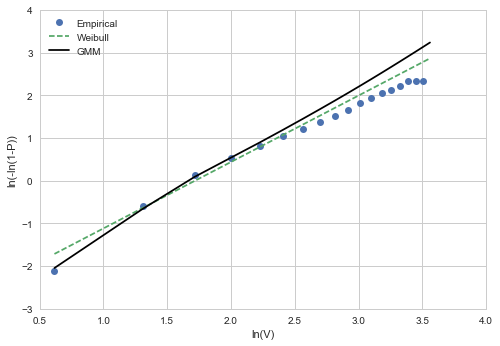

In [62]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y_cdf_gmm = array(list(zip(*y_))[0])

plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

Speed Distribution Comparison


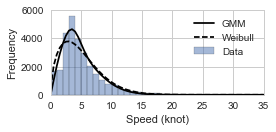

In [63]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y_gmm = array(list(zip(*y_))[0])*len(df.speed)/0.02

# 2. Weibull
y_weibul = sp.stats.weibull_min.pdf(x, *weibull_params)

df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')
plot(x, y_gmm,'-', color='black', label='GMM')
plot(x, y_weibul*len(df.speed), '--', color='black', label='Weibull') 
print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text,
              ylabel='Frequency',legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

Direction Distribution Comparison


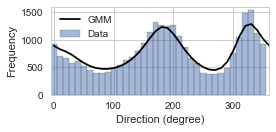

In [64]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
title='Direction Distribution Comparison'
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print(title)

In [65]:
# %%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.891591426227


## 6.3 Sectoral Comaprison

In [66]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        # 1. Get Weibull and ECDF
        x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed)
        # 2. Get GMM PDF, CDF
        _, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)
        
        # 3. Make Plots
        fig = plt.figure(figsize=(10,1.9))
#         fig = plt.figure(figsize=(10,1.7))
        # 3.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')                  
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
#         plt_configure(xlabel = "$V$", ylabel='Frequency', legend=True)
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 3.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
#         plt_configure(xlabel = "$V$", ylabel='$P$', legend=True)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 3.3. Weibull Comparison
#         ax3 = fig.add_subplot(1,3,3)
#         plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
#         plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
#         plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
#         plt.gca().set_xlim(right = log(max_speed+1))
# #         plt_configure(xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)",legend={'loc':'best'})
#         plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        
        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'], bins=bins, normed=True)
        density_expected_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                            for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_ ))[0])/direction_prob
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.weibull_min.cdf(bins[1:], *weibull_params) - sp.stats.weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        diff, diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], 
                               diff_weibull.max(), x[diff_weibull.argmax()], R_square_gmm, R_square_weibull])
        curves = {'angle': angle, 'data_size': data_size, 'weight': direction_prob, 
                  'x': x, 'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', diff.max(), diff_weibull.max(), 'speed value:', x[diff.argmax()], x[diff_weibull.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()])
        print(' ')
    return max_diff_array, curve_collection

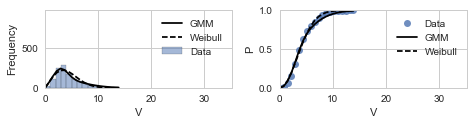

5.0 (-5.0 - 15.0) degree
data size: 1190 weight 0.04240005700848001
GMM Weibull
R square 0.941013596534 0.901249735501
max diff: 0.0431872267562 0.0423372188494 speed value: 8.75519572132 2.18879893033 y gmm 0.922358991731
 


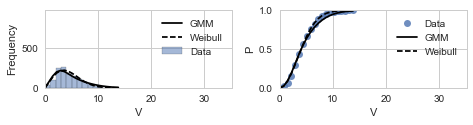

25.0 (15.0 - 35.0) degree
data size: 1248 weight 0.044466614408893324
GMM Weibull
R square 0.920220103213 0.93613647517
max diff: 0.0505266198494 0.0345875030929 speed value: 7.26012650975 2.17803795293 y gmm 0.834890046817
 


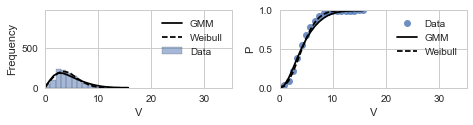

45.0 (35.0 - 55.0) degree
data size: 1129 weight 0.04022660870804532
GMM Weibull
R square 0.913527922499 0.965828067128
max diff: 0.0715573736226 0.0575893346446 speed value: 6.59846424683 4.12404015427 y gmm 0.795581687493
 


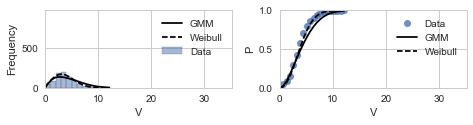

65.0 (55.0 - 75.0) degree
data size: 846 weight 0.030143233806028645
GMM Weibull
R square 0.816321204173 0.946425739321
max diff: 0.139287104627 0.0641914829661 speed value: 5.09885335072 3.82414001304 y gmm 0.655039136508
 


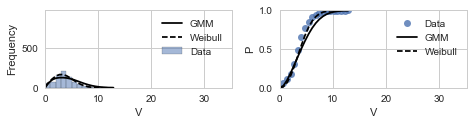

85.0 (75.0 - 95.0) degree
data size: 815 weight 0.02903869450580774
GMM Weibull
R square 0.758140866016 0.916818777993
max diff: 0.162880560666 0.103834738458 speed value: 4.74364424627 4.06598078252 y gmm 0.605217598844
 


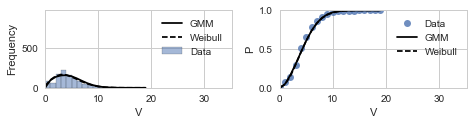

105.0 (95.0 - 115.0) degree
data size: 1033 weight 0.03680609990736122
GMM Weibull
R square 0.875978898275 0.896339637303
max diff: 0.0550435561007 0.0551538838729 speed value: 5.97420457682 5.97420457682 y gmm 0.736824788527
 


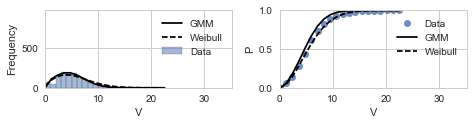

125.0 (115.0 - 135.0) degree
data size: 1318 weight 0.04696073540939215
GMM Weibull
R square 0.917451099982 0.924860844398
max diff: 0.0697196973489 0.0493741250357 speed value: 4.7384018363 5.92300229538 y gmm 0.509021670035
 


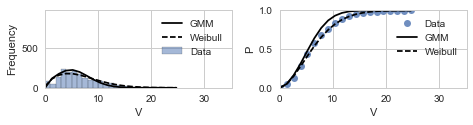

145.0 (135.0 - 155.0) degree
data size: 1732 weight 0.061711679612342335
GMM Weibull
R square 0.875958436948 0.899972284745
max diff: 0.107254375725 0.0369739168742 speed value: 9.10859521109 6.50613943649 y gmm 0.870533821452
 


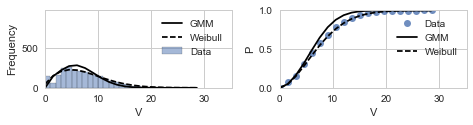

165.0 (155.0 - 175.0) degree
data size: 2474 weight 0.08814936221762987
GMM Weibull
R square 0.837399457279 0.924895299138
max diff: 0.0985288001349 0.0318231684276 speed value: 9.02285813041 6.01523875361 y gmm 0.783249899569
 


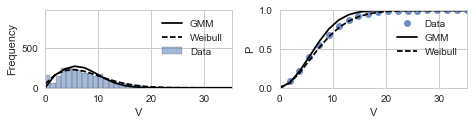

185.0 (175.0 - 195.0) degree
data size: 2531 weight 0.09018028931803605
GMM Weibull
R square 0.878083875687 0.932952441763
max diff: 0.0753235181465 0.0445611915504 speed value: 9.25372932591 5.55223759555 y gmm 0.761613522097
 


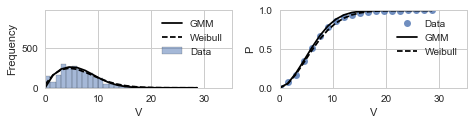

205.0 (195.0 - 215.0) degree
data size: 2333 weight 0.08312548991662509
GMM Weibull
R square 0.913308809511 0.92236783857
max diff: 0.0279952295248 0.036898438529 speed value: 12.0563772664 6.0281886332 y gmm 0.941411431839
 


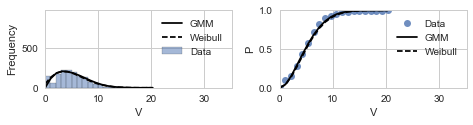

225.0 (215.0 - 235.0) degree
data size: 1537 weight 0.05476377111095276
GMM Weibull
R square 0.86173592319 0.886024495202
max diff: 0.0558787024516 0.0576929314187 speed value: 1.06748076242 1.06748076242 y gmm 0.0430152468002
 


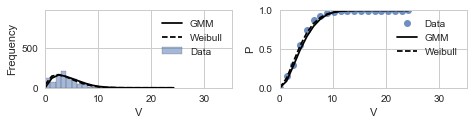

245.0 (235.0 - 255.0) degree
data size: 962 weight 0.03427634860685527
GMM Weibull
R square 0.845325588138 0.871607808436
max diff: 0.0796094399807 0.0438449080986 speed value: 6.37239484823 6.37239484823 y gmm 0.796689936319
 


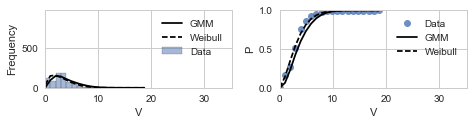

265.0 (255.0 - 275.0) degree
data size: 743 weight 0.02647331290529466
GMM Weibull
R square 0.789926707478 0.821187066166
max diff: 0.151520353617 0.0834755889584 speed value: 3.93259621136 1.96629810568 y gmm 0.602180857689
 


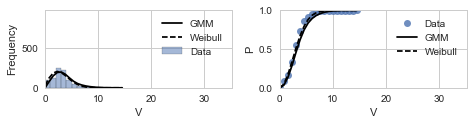

285.0 (275.0 - 295.0) degree
data size: 880 weight 0.03135466400627093
GMM Weibull
R square 0.902181755341 0.909764746177
max diff: 0.118163087528 0.0669110313499 speed value: 3.82318511089 3.82318511089 y gmm 0.621609639745
 


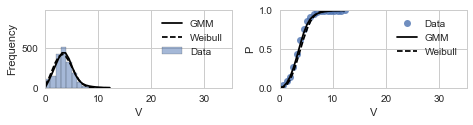

305.0 (295.0 - 315.0) degree
data size: 1802 weight 0.06420580061284116
GMM Weibull
R square 0.951972400081 0.937556152654
max diff: 0.0612783191275 0.134287486349 speed value: 3.85128547643 3.85128547643 y gmm 0.561918129263
 


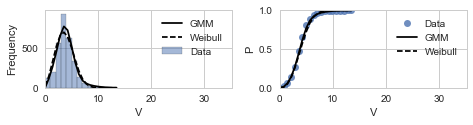

325.0 (315.0 - 335.0) degree
data size: 3022 weight 0.10767476662153495
GMM Weibull
R square 0.9622180807 0.922702889326
max diff: 0.0386709409176 0.0861840862144 speed value: 4.95907033239 4.95907033239 y gmm 0.76940318218
 


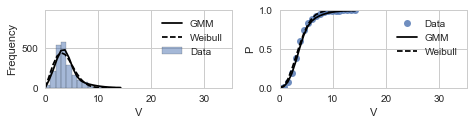

345.0 (335.0 - 355.0) degree
data size: 2033 weight 0.07243639991448728
GMM Weibull
R square 0.924250753951 0.895145752095
max diff: 0.0909625359314 0.051278041528 speed value: 3.74630857337 3.74630857337 y gmm 0.515530331752
 
Wall time: 53.8 s


In [67]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
max_diff_array, curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

0.8934799879528382 0.9154792615039528


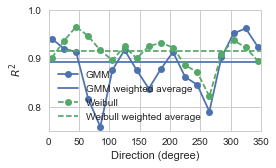

In [68]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull', 'r_square_gmm', 'r_square_weibull'])  

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(gmm_mean, weibull_mean)

0.07497111119903163 0.058622503211435084


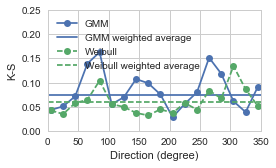

In [69]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.gmm, diff_df.weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(gmm_mean, weibull_mean)

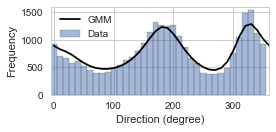

In [70]:
# Compare direction weight with previous figure
display(dir_fig)

## 6.4 Insufficient-fit Sector Investigation

### 6.4.1 Data Variability, by Bootstrap (Resampling)

In [71]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = rebinned_angle

In [72]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: divide by zero encountered in log


85.0 (75.0 - 95.0) Degree Speed Distribution
0.182819388482 5.0 0.640493494954


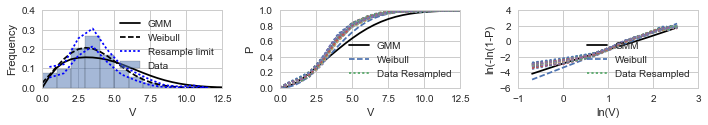

In [73]:
x = arange(0, sub_max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed, x)
_, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)

fig = plt.figure(figsize=(10,1.9))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_cdf_gmm,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color = 'black',label='GMM')

# 3. Weilbull 
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_cdf_weibull,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
#         plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
#         plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)",legend={'loc':'best'})
        plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
# plt_configure(ax=ax1, xlabel='$V$',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax1, xlabel='V', ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)
plt.tight_layout()
diff = abs(y_ecdf - y_cdf_gmm)
print(diff.max(), x[diff.argmax()], y_cdf_gmm[diff.argmax()])

### 6.4.2 Time Variability

In [74]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

ax2.plot(x, y_cdf_gmm,'-', color='black', label = 'GMM')
ax2.plot(x, y_cdf_weibull,'--', label='Weibull')

ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black',label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
# plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
# plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)", legend={'loc':'best'})
plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)", legend={'loc':'best'})

ax1.set_zlim(bottom = 0)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: divide by zero encountered in log


85.0 (75.0 - 95.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmUHNV9NvzU0tv07PsujUYbsiACQQCz2A5gO7JlB38I
gdkMGIxPEi8cOwdIHMsKEQQFx35tw4lN8EIcg8F4kY3AAcQS8PuGxQILWxrtYsRMLzM9vXfX+v0x
3FJ1dVV19Trdmvucw2HU3ffW7aqu+9Rve36MqqoqKCgoKCgoKGzBLvQCKCgoKCgoGgGUMCkoKCgo
KByAEiYFBQUFBYUDUMKkoKCgoKBwAEqYFBQUFBQUDkAJk4KCgoKCwgEoYVJQUFBQUDgAJUwKCgoK
CgoHoIRJQUFBQUHhAJQwKSgoKCgoHIASJgUFBQUFhQNQwqSgoKCgoHAASpgUFBQUFBQOQAmTgoKC
goLCAShhUlBQUFBQOAAlTAoKCgqKmuHtt9/G5z73OVx++eW49tprcfPNN2P//v341re+hVNOOQWB
QED77MzMDN7znvfg8ccfx+TkJFatWoXvfve7OfPdcsstuOaaa2qydkqYFBQUFBQ1QTqdxmc/+1lc
f/31+OlPf4of/ehH+Ju/+Rts3boVALB06VLs3LlT+/wTTzyBgYEB7d+jo6N46qmntH9HIhEcPXq0
Zuvna3YkCgoKCoq6wZe//GU8+uijFZ1z06ZN2L59u+X7u3btwjnnnIPTTz9de+20007Dj370I3z7
29/Ghg0b8OSTT+JTn/qU9vkPfOAD2mc7OjrQ3t6OgwcPYnx8HDt37sSHP/xhvPrqqxX9HlagFiYF
BQUFRU0wOTmJ0dFR7d+f/exncc011+DDH/4wpqen0d3dDZ/Ph7fffhtHjx5Ff38/PB5Pzhwf+chH
8Jvf/AYA8Mwzz+Diiy+u2fqphUlBQUGxCLF9+3Zba7Aa6O/vx549e7R/33///QCAyy+/HLIsAzhB
iJIkYePGjXjppZdy5rj44otx1VVX4ROf+AR6enrg9Xprtn5qYVJQUFBQ1AQXXXQRfve732H37t3a
a0ePHsX09DQYhgEAfOhDH8IzzzyDV199FWeffXbeHH6/H2NjY9i+fTs++tGP1mztACVMCgoKCooa
we/34/7778cPf/hDXH311bjiiitwxx134Pbbb8fg4CAAoKWlBf39/VizZg1Y1pyiNm7ciNdeew3n
nntuLZcPRlVVtaZHpKCgoKCgaEBQC5OCgoKCgsIBKGFSUFBQUFA4AM2SpViUUBQFkiRBEARwHAeW
ZcFxHDiO05IPKCgoKPSghEmxqKAoCgKBADo6OrR/q6oKVVWRTCYRj8cxODgIlmXBMAwlUgoKCg2U
MCkWBRRFgSzLUBQFU1NTaG9vh6IoEEURLpdLI0NCoKQmjOTEMQyjESglUgqKxQlKmBQnNYjrVZ8M
rqoqQqEQZmdnwTAMZFmG2+0Gy7KQJAnJZBJutxs8z+eQoVMi5Xle+zcFBcXJA5r0Q3FSQpZlCIIA
QRA0cpMkSeuEIAgCxsbGMDY2hmXLlqG3txcejweqqiISieDYsWM4ePAgjh07hunpaUQiESSTSY18
CVECJ4hUkiRks1nNtZtIJJBKpZBOp5HNZiHLMmgVF8VixnXXXYc333wTwPw9uH79ejzwwAPa+9dc
cw3+9Kc/5Y174YUX8Mgjj2BychKXX3654+Odd9552rwHDx4sc/XUwqQ4ySDLsuZ6JaQmSRLC4TAi
kQhaW1vBsiwGBgbAcZyW9OPz+aCqKrLZLIaHh7W5stksBEFANptFIpHQCNjj8cDtdsPtdmt/F7JI
s9ksAIBlWc0CJW5dapFSLAacd955ePXVV3Haaafhtddew/nnn4/nn38en/70p5HNZnH8+HGsXr06
b9yFF14IYF6LdiFBCZPipIAZUYqiiHA4jLm5ObS1tWF8fBxutxvxeDzHpWoFjuPQ1NSEpqamnNdJ
di0h00QigWw2C4ZhcgiU/G2Mc+qJVBRFzWIlcVH935RIKaqJpUvzX7vySuCuu0p7/8gR++O9973v
xX333YcbbrgBzz//PDZt2oR//dd/RTwex1tvvYU///M/xyuvvIJ/+7d/A8dxGBkZwdatW7Fjxw4c
OnQIV1xxBWZnZ3HLLbdgZmYG73//+/HXf/3XuO2227BhwwZceOGFeOGFF/DEE0/g7rvvLu5kOAAl
TIqGhhlRCoKAcDiMaDSK9vZ2LF++HC6Xq+BcDMM4cpnyPA+e53OIlJAgIdFMJoNYLAZBEMAwjEai
ejIl5Kh37UqSpP1NiFRPnLIsm5IwBUUjYM2aNTh06BBUVcUrr7yCW2+9Feeeey5efvll7Nu3D+ef
fz6+8pWv4L/+67/Q1dWFb3zjG/j5z38Onj9BValUCtu3b0dTUxOuuuoqXHTRRTVbPyVMioYDyXhV
VTWPKEOhEGKxGDo6OrBixYqcG43AKTEWA4ZhNCL1+/3a64QECZGm02nMzc1prmA9iZL/E3LUZ+4q
igIAOHDgAJYuXaolFhmTjfTjKCgKoZBFWO77RrAsi9WrV+OFF15AT08P3G43LrzwQjz33HPYu3cv
rrrqKnzlK1/BF77wBQBAJpPBe9/7XixZskSbY/Xq1WhpaQEAnHrqqTh8+HDOMaqZJ0AJk6JhQAgy
nU7j0KFDWLVqFRiGQTabRSgUQjweR2dnpyVRElgRZrWI1OVy5Vm4qqpCFEUtMSmVSmlEyvN8XnyU
ECmZE8glUr2L2SpGSkFRDzjvvPPw7//+7/jIRz4CAFi/fj3uu+8+APMNovv7+3HfffehpaUFzzzz
DJqamjA1NaWNP3jwIJLJJDweD958801s3rwZv/vd7xAKhQAAf/zjH6u2dkqYFHUPQpT68hCSRBMM
BpFIJBwRpRELaYmReKfb7c55nRCpPj4qCAJEUQTP81AUBbOzs/B6vdp4o1WpJ1JBELTjGYnUmKRE
QVELvPe978U//MM/4J577gEAuN1utLS04JRTTgHLsvj7v/973HzzzVBVFX6/H/fcc08OYba1teGL
X/wiZmdnsWHDBixfvhybNm3CHXfcgR07dmCpWeC1QqDdSijqFiQuSNyvZHNPJpM4cuQIWJZFV1cX
urq6wHGc43n379+PkZEReL1ejVAAIJvNYmpqqqo3XKlQVRWCIODYsWNob2/XSFWSJLhcrjzXrl6M
wWo+IJ9IeZ6n8VEKCgtQC5Oi7mBGlAzDIJ1OIxQKIZlMAgBWrlxZFFESVMP1Wm2QxCGGYdDZ2al9
b6JWRCxSkmhEiNQYHyVEWoxFSlWNKCjmQQmTom5gRZSpVAqhUAjpdBrd3d0YHBzEvn37SiJL/bGM
aEQiZVkWHo8HHo8n53VFUXJKX0h8lKgaGUtfzBKGCJHqzwlx51J5QIrFCEqYFAsOO6IMBoPIZDLo
6enByMgIWJbVSi5KxWLY3FmWhdfrhdfrzXldr4CUzWaRSqWQzWahKIpp6YtZnNMoD0iOR9y6oijC
6/UWdAtTUDQaKGFSLBisiDKZTCIYDEIQBPT09GB0dNQ0y1Mf1ywGtcySrTcQVSOfz5fzOiFSY7KR
qqqmpS92YgxHjhzB4OCg5kKmgvUUJwsoYVLUHKqqYm5uDgDg8/m0zTORSCAYDEKSJPT09KC9vd10
YyXEWgnCXAwk6QRWRFpI1chIphzH5VwX2vmF4mQCJUyKmkEvUh6NRsHzPHw+H+LxOILBIGRZRm9v
L9ra2gpunNWqmaTkmYtSVI30pS9OLFIr1y7t/EJRb6CESVF1EGUeskESCyOTyeDQoUNQFAW9vb1o
bW0tamMsldwoMZaHQqpGR48eBc/zyGQyiEajjlSN9HNQwXqKegUlTIqqQd+0mbjpVFVFNBrF3Nwc
VFXF4OBg0UQ

### 6.4.3 Adjacent Sector Variability

In [75]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [76]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('angle == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['data_size'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


85.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuYHGWdNnxXVZ+mu+d8yhwymZkkkIQwkA0SQjCfrLAg
mvWwkJVoFgEBsygGX3WRkwq+oEQRPjS4wqsuhzUEAYXVwLdEIYq8roAGEwgJk+NkMn2anj5XVdfh
+2N4KtXVh+ljdU/Pc19Xrsz09FNPVXfVcz+/0/1jVFVVQUFBQUFBQZETbLVPgIKCgoKCYjaAEiYF
BQUFBUUeoIRJQUFBQUGRByhhUlBQUFBQ5AFKmBQUFBQUFHmAEiYFBQUFBUUeoIRJQUFBQUGRByhh
UlBQUFBQ5AFKmBQUFBQUFHmAEiYFBQUFBUUeoIRJQUFBQUGRByhhUlBQUFBQ5AFKmBQUFBQUFHmA
EiYFBQUFBUUeoIRJQUFBQUGRByhhUlBQUFCYhmPHjuGGG27A+vXr8S//8i+49tprceDAATzwwANY
unQpPB6P9t5AIIDTTjsNTz/9NMbGxnDqqafixz/+ccrxPve5z2Hjxo2mnDslTAoKCgoKU5BIJLBp
0yZceeWV2L59Ox555BF8/vOfxx133AEAGBwcxI4dO7T3/+Y3v0FPT4/2+8DAAF544QXt92AwiCNH
jph2/hbTZqKgoKCgqBl85StfwZNPPlnWY1522WXYsmVL1r//7ne/wznnnIMVK1Zor42MjOCRRx7B
D37wA1xyySV4/vnn8ZnPfEZ7//nnn6+9t7W1FS0tLRgdHcXChQuxY8cOXHzxxXjttdfKeh3ZQC1M
CgoKCgpTMDY2hoGBAe33TZs2YePGjbj44osxMTGBjo4ONDQ04NixYzhy5AjmzZsHu92ecowPf/jD
+PWvfw0A2LlzJy644ALTzp9amBQUFBRzEFu2bMlpDVYC8+bNw549e7TfH3zwQQDA+vXrIcsygJOE
KEkS1q1bh1deeSXlGBdccAE+9alP4ROf+AQ6OzvhcDhMO39qYVJQUFBQmIIPfvCDePXVV/HXv/5V
e+3IkSOYmJgAwzAAgIsuugg7d+7Ea6+9hlWrVqUdw+VyYWhoCFu2bMFHPvIR084doIRJQUFBQWES
XC4XHnzwQfzHf/wHPv3pT+OTn/wkbr75Znzta19Db28vAKCxsRHz5s3DsmXLwLKZKWrdunV4/fXX
sXr1ajNPH4yqqqqpM1JQUFBQUMxCUAuTgoKCgoIiD1DCpKCgoKCgyAM0S5ZiTkJRFEiSBFEUwXEc
WJYFx3HgOE5LPqCgoKDQgxImxZyCoijweDxobW3VfldVFaqqIhaLIRKJoLe3FyzLgmEYSqQUFBQa
KGFSzAkoigJZlqEoCk6cOIGWlhYoioJkMgmr1aqRISFQUhNGcuIYhtEIlBIpBcXcBCVMiroGcb3q
k8FVVYXP58Pk5CQYhoEsy7DZbGBZFpIkIRaLwWazwWKxpJBhvkRqsVi03ykoKOoHNOmHoi4hyzJE
UYQoihq5SZKkdUIQRRFDQ0MYGhrC8PAwurq6YLfboaoqgsEgjh49itHRURw9ehQTExMIBoOIxWIa
+RKiBE4SqSRJEARBc+1Go1HE43EkEgkIggBZlkGruCjmMq644gq8+eabAKafwZUrV+Lhhx/W/r5x
40a8/fbbaeN27dqFJ554AmNjY1i/fn3e861Zs0Y77ujoaIlnTy1MijqDLMua65WQmiRJ8Pv9CAaD
aGpqAsuy6OnpAcdxWtJPQ0MDVFWFIAjo7+/XjiUIAkRRhCAIiEajGgHb7XbYbDbYbDbt55ksUkEQ
IEkSgsEgenp6wDCM5talFinFXMCaNWvw2muvYWRkBK+//jrOO+88vPzyy/jsZz8LQRBw/PhxLFmy
JG3c2rVrAUxr0VYTlDAp6gKZiDKZTMLv92NqagrNzc1YuHAhbDYbIpFIiks1GziOg9PphNPpTHmd
ZNcSMo1GoxAEAQzDpBAo+Vkf5yTJRYRIk8mkZrGSuKj+Z0qkFJXE4GD6a5dfDtx9d3F/P3w493zn
nnsutm7diquuugovv/wyLrvsMnz3u99FJBLB3r17cfbZZ+PPf/4zvv/974PjOMyfPx933HEHnnvu
ORw8eBCf/OQnMTk5ic997nMIBAL4wAc+gOuvvx433XQTLrnkEqxduxa7du3Cb37zG3z7298u7MPI
A5QwKWY1MhGlKIrw+/0IhUJoaWnBokWLYLVaZzwWwzB5uUwtFgssFksKkRJrkpAoz/MIh8MQRREM
w2gkynGcloBEyFFPppIkaT8TItUTJyVSitmMZcuW4eDBg1BVFX/+85/xpS99CatXr8Yf//hHvPPO
OzjvvPNw22234T//8z/R3t6O++67D8888wwslpNUFY/HsWXLFjidTnzqU5/CBz/4QdPOnxImxayD
qqpQFAV+vx+CIKC7u1sjSp/Ph3A4jNbWVixevDjlQSPIlxgLAcMwGpG6XK6UcyWxTVEUkUgkoCgK
Dh48CI7jUixS8j8hQ33mrqIo2vHIfCzLpiUb6cdRUMyEmSzCUv9uBMuyWLJkCXbt2oXOzk7YbDas
XbsWL730Evbt24dPfepTuO2227B582YAAM/zOPfcc7FgwQLtGEuWLEFjYyMA4PTTT8ehQ4dS5qhk
ngAlTIpZA0KUxKIk1qUgCPD5fIhEImhra8tKlATZCLNSRGq1WjULVxRFHD9+HIODg0gmk1piUjwe
x9TUFERRhMViSYuP6omUIBeRxmIxNDQ0wOFwaBYpBUUtYM2aNfj3f/93fPjDHwYArFy5Elu3bgUw
3SB63rx52Lp1KxobG7Fz5044nU6cOHFCGz86OopYLAa73Y4333wT//zP/4xXX30VPp8PAPDWW29V
7NwpYVLUPAhRGjNUJUlCNBpFKBTKiyiNqIYlRkiZxDttNlvK31VVRTKZTImPiqKIZDIJi8WSZo3a
bLY0q1JRFAQCAbS2tma1SDmOS0tSoqAwA+eeey5uvfVW3HPPPQAAm82GxsZGLF26FCzL4pZbbsG1
114LVVXhcrlwzz33pBBmc3MzbrzxRkxOTuKSSy7BokWLcNlll+Hmm2/Gc889h8FMgdcygXYroahZ
kLggKccgizvP85pFabPZMDQ0BI7j8j7ugQMHMH/+fDgcDoiiqL0uCAJOnDhR0QcumUzi2LFjGB4e
LmicqqqaNarP3JUkCVarNc216/F40NbWluIeNh4PSCdSi8VCxRgoKLKAWpgUNYdMRMkwDBKJBHw+
H+LxONrb2+FyuRCLxQoiS6AyrtdKgyQO2e12LX4DQFMrIiRKEo2SySQ8Hg8aGhpSyJSoGmVz7ZIN
hJ5IqaoRBcU0KGFS1AyyEWU8HofP50MikUBHRwf6+/vBsixCoVDRxGdWDLPSYFlWI1I9jh07Brfb
DZZlIYqiFh8lqkbG0pdMCUOESPWfCXHnkvcS1zIlUoq5AEqYFFWHoiiIx+OwWq1pROn1esHzPDo7
OzF//vyU5JViCa7ai7tZpGyz2dJcsnoFJEEQEI/HIQgCFEXJGB/NFOckNaSyLGN0dBSLFy9Oy9il
FilFPYISJkXVQCxKnucxOjqKJUuWgGEYxGIxeL1eiKKIzs5ODAwMZMzyLIUwq2VhmkkgmeYiqkYN
DQ0prxMiNSYbqaqasfTFaGVSwXqKuQBKmBSmI5PrVZZlRKNReL1eSJKEzs5OtLS05FxYy0GYs9EN
WwlkI9JcqkbEIzA1NZVR1QjIX7CeEinFbAAlTArToBcpB05aQLFYDKqqYnx8HF1dXWhubs5r4Sw3
2VHyTEcuVaNEIoGJiYmsqkaZLFLjMcjPBJnEGKiqEUWtgBImRcWhFxkAThJTOByGz+fTMjQXL15c
0MJYbpcsRX4

# 7. Result Variability & Cross-Validation

In [77]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

print(bandwidth, FIT_METHOD)

0.7 square_error


## 7.1 Variability of the Result

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.691  -1.913   0.336  4.954  3.581   0.083
2  0.159   2.780  -1.967  1.278  1.329  -0.071
3  0.150   1.206  -0.168  2.115  1.755   0.387

GMM Plot Result
0.69137052063 [[-1.91298226  0.33648134]] [ 3.55492455  4.97233077] -82.9388753409
0.158931991777 [[ 2.77996832 -1.96708623]] [ 1.25006013  1.35608387] -149.381619661
0.149697487593 [[ 1.20584246 -0.16764222]] [ 1.47656805  2.31831812] -57.9145175723


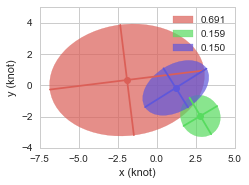

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.983  0.020      0.044  1.452490e-07      0.020       0.246

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.983  0.018      0.042  1.473480e-07      0.020       0.248

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.771  -1.425   0.210  4.788  3.361   0.118
2  0.215   2.539  -1.583  1.428  1.571  -0.175
3  0.015  -0.007  -0.153  0.466  1.519   0.917

GMM Plot Result
0.770774833266 [[-1.42521621  0.21038266]] [ 3.31601787  4.81934537] -80.9451158036
0.21452921717 [[ 2.5387039  -1.58274106]] [ 1.34388437  1.64329598] -149.240743183
0.0146959495642 [[-0.00682602 -0.15263387]] [ 0.17851161  1.5785485 ] 164.079346947


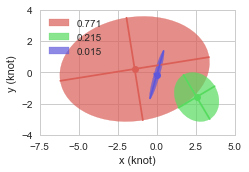

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.987  0.025      0.077  1.079191e-07      0.017       0.212

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.987  0.024      0.083  1.057431e-07      0.017       0.210

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.754  -1.547   0.219  4.833  3.394   0.137
2  0.223   2.535  -1.571  1.384  1.566  -0.128
3  0.022  -0.192  -0.196  0.608  0.622   0.007

GMM Plot Result
0.754418238477 [[-1.54681106  0.21860424]] [ 3.33261867  4.87530749] -79.6168978146
0.223198275012 [[ 2.53494386 -1.57089651]] [ 1.34089495  1.60279271] -157.058557609
0.0223834865117 [[-0.19229805 -0.1963364 ]] [ 0.60739584  0.62228173] 171.360495256


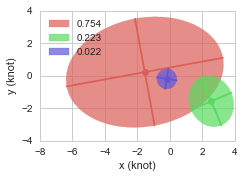

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.023      0.078  8.287897e-08      0.015       0.186

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.990  0.025      0.079  8.712190e-08      0.015       0.190

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.552  -2.275   0.945  5.139  3.376   0.055
2  0.250   2.450  -1.592  1.583  1.630  -0.275
3  0.198  -0.759  -0.789  3.786  2.761   0.633

GMM Plot Result
0.552207363838 [[-2.2747951   0.94453528]] [ 3.36691567  5.14472759] -86.385709621
0.249940015747 [[ 2.44953365 -1.59177156]] [ 1.36630286  1.81481627] -138.021552808
0.197852620415 [[-0.75851572 -0.78874869]] [ 1.88765505  4.28922625] -58.444674436


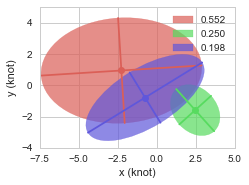

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.017      0.037  1.600852e-07      0.020       0.258

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.017      0.033  1.526316e-07      0.020       0.252

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.697  -1.897   0.435  4.976  3.535   0.088
2  0.199   2.722  -1.797  1.362  1.416  -0.086
3  0.105   0.493  -0.130  2.260  1.817   0.581

GMM Plot Result
0.696951364224 [[-1.89733324  0.43484936]] [ 3.50784616  4.9950252 ] -82.882703965
0.19854348956 [[ 2.72204852 -1.79661253]] [ 1.32235551  1.45352989] -147.275889541
0.104505146216 [[ 0.49252249 -0.12962736]] [ 1.286218    2.59914759] -55.3611295199


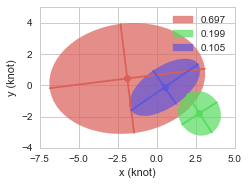

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.985  0.017      0.039  1.262270e-07      0.018       0.229

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.018      0.042  1.480819e-07      0.020       0.248

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.553  -2.374   0.907  5.099  3.539   0.037
2  0.231   2.516  -1.688  1.516  1.582  -0.224
3  0.216  -0.220  -0.339  3.713  2.571   0.590

GMM Plot Result
0.553006348382 [[-2.37362169  0.90734554]] [ 3.53429223  5.10194466] -87.1924376865
0.230688214994 [[ 2.51568246 -1.68771328]] [ 1.36144236  1.7161455 ] -140.394521611
0.216305436624 [[-0.21987811 -0.33851051]] [ 1.87554186  4.10844323] -61.2472474233


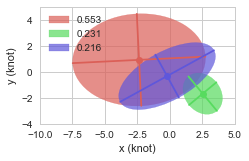

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.016      0.034  1.567372e-07      0.020       0.255

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.017      0.030  1.482759e-07      0.020       0.248

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.576  -2.172   0.925  5.062  3.338   0.064
2  0.239   2.511  -1.637  1.544  1.585  -0.219
3  0.185  -0.669  -0.815  3.652  2.823   0.668

GMM Plot Result
0.575665825148 [[-2.17181824  0.92498337]] [ 3.32640383  5.06976599] -85.7774057802
0.238866167676 [[ 2.51108965 -1.63741566]] [ 1.38164832  1.72856976] -138.411338562
0.185468007176 [[-0.66918412 -0.81458175]] [ 1.8059524   4.24772827] -55.6508093814


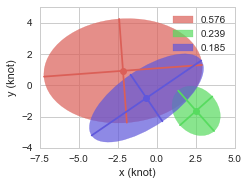

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.018      0.039  1.558605e-07      0.021       0.254

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.018      0.037  1.480144e-07      0.020       0.248

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.618  -2.461   0.458  4.907  3.703   0.094
2  0.208   2.623  -1.751  1.442  1.465  -0.216
3  0.174   0.927   0.044  2.798  2.177   0.482

GMM Plot Result
0.617598564956 [[-2.4607273   0.45842767]] [ 3.66628441  4.93438568] -80.8872104063
0.207958209428 [[ 2.62321841 -1.75068357]] [ 1.2865313   1.60325147] -137.099752566
0.174443225617 [[ 0.92679388  0.04443883]] [ 1.72210418  3.09842956] -58.8827118042


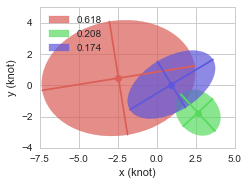

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.983  0.019      0.036  1.423218e-07      0.019       0.244

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.017      0.034  1.503005e-07      0.020       0.250

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.413   0.721   0.098  3.458  2.693   0.230
2  0.382  -4.646   0.587  4.486  4.078   0.144
3  0.205   2.494  -1.688  1.563  1.520  -0.300

GMM Plot Result
0.413012853431 [[ 0.72105451  0.09790008]] [ 2.53474412  3.57561092] -68.8457523351
0.382351752001 [[-4.64586335  0.58676693]] [ 3.90036964  4.64110331] -61.7754692803
0.204635394568 [[ 2.49428554 -1.68838647]] [ 1.28829582  1.75884791] -132.298384307


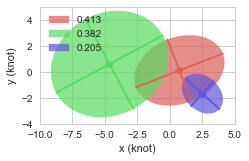

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.983  0.016      0.030  1.464372e-07      0.020       0.247

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.017      0.026  1.504285e-07      0.020       0.250

weight  mean_x  mean_y  sig_x  sig_y    corr
1  0.404  -4.353   0.763  4.500  4.002   0.152
2  0.384   0.575   0.025  3.465  2.638   0.278
3  0.212   2.571  -1.719  1.498  1.510  -0.256

GMM Plot Result
0.404051618787 [[-4.35251887  0.76286715]] [ 3.83038741  4.64693699] -63.8535012465
0.383515344405 [[ 0.57521336  0.02454561]] [ 2.42848756  3.61498428] -67.3914856066
0.212433036808 [[ 2.5706995 -1.7186576]] [ 1.29730268  1.68560058] -135.910225126


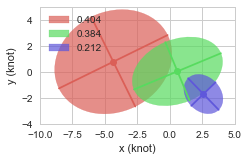

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.983  0.016      0.026  1.486341e-07      0.020       0.248

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.983  0.018      0.029  1.463449e-07      0.020       0.247


Wall time: 18.3 s


In [78]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(10))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 7.2 Cross-validation, to select the number of Gaussian

In [79]:
# df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn%400 == 0)')

In [80]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

Number of train/test dataset 21049.5 7016.5
  
Number of gaussian 1
Train


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.265381  0.108183  0.000002    0.076498     0.930303  0.752522
1    0.271511  0.109214  0.000002    0.075540     0.949822  0.745532
2    0.259815  0.107343  0.000002    0.074970     0.920760  0.756905
3    0.266679  0.107844  0.000002    0.075247     0.933354  0.754030

Test


Chi_square       K_S       MSE  RMSE / Max  RMSE / Mean  R_square
0    0.281642  0.111782  0.000002    0.074315     0.961829  0.741995
1    0.264095  0.103723  0.000002    0.075341     0.890157  0.770350
2    0.302522  0.108734  0.000002    0.077602     0.976649  0.736717
3    0.283964  0.108973  0.000002    0.075091     0.929209  0.750392

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.093485  0.025495  1.904029e-07    0.022566     0.281410  0.977583
1    0.093327  0.025289  1.858053e-07    0.022539     0.278121  0.977985
2    0.093168  0.025208  1.882939e-07    0.022680     0.279999  0.977750
3    0.103914  0.023478  1.851965e-07    0.022378     0.277511  0.977994

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.109078  0.024248  1.983231e-07    0.023292     0.287468  0.976241
1    0.104267  0.022728  2.182793e-07    0.023501     0.301163  0.974358
2    0.140586  0.027707  2.061258e-07    0.023632     0.292590  0.975581
3    0.095697  0.026695  2.197475e-07    0.024149     0.302678  0.974404

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.049021  0.018897  1.372903e-07    0.019246     0.239079  0.983827
1    0.029695  0.017334  1.512606e-07    0.020295     0.250984  0.982238
2    0.028738  0.015156  1.420586e-07    0.019655     0.243099  0.983143
3    0.029703  0.014688  1.470808e-07    0.020164     0.247250  0.982452

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.061905  0.021988  1.953150e-07    0.023431     0.284849  0.976660
1    0.046087  0.015687  1.597586e-07    0.020906     0.257510  0.980726
2    0.042487  0.015647  1.835019e-07    0.022303     0.276430  0.978542
3    0.052393  0.018637  1.664804e-07    0.020488     0.263645  0.980837

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.018732  0.010832  1.254059e-07    0.018202     0.228522  0.985225
1    0.019183  0.010825  1.318249e-07    0.018870     0.234120  0.984437
2    0.021785  0.013834  1.211338e-07    0.017861     0.224571  0.985692
3    0.023578  0.013100  1.314486e-07    0.019476     0.233808  0.984334

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.028185  0.020733  1.688495e-07    0.022492     0.264762  0.979836
1    0.028705  0.016085  1.411449e-07    0.019312     0.242618  0.983238
2    0.040397  0.014818  1.818124e-07    0.021988     0.274825  0.978450
3    0.028356  0.023615  1.650184e-07    0.019565     0.262262  0.980978

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.013925  0.007528  2.707624e-08    0.008522     0.106156  0.996806
1    0.025893  0.012991  9.183516e-08    0.015546     0.195437  0.989269
2    0.019773  0.009528  4.734432e-08    0.011470     0.140337  0.994341
3    0.074982  0.012568  5.969539e-08    0.012861     0.157648  0.992908

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.025186  0.015270  6.595483e-08    0.013747     0.165607  0.992156
1    0.040379  0.014970  1.551327e-07    0.021166     0.254245  0.981035
2    0.030375  0.011237  7.875900e-08    0.014246     0.181113  0.990985
3    0.071792  0.028037  1.140744e-07    0.016487     0.217696  0.986737

Wall time: 1min 2s


In [81]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.265846  0.108146  2.094744e-06    0.075563     0.933560  0.752247
2    0.095974  0.024868  1.874246e-07    0.022541     0.279260  0.977828
3    0.034289  0.016519  1.444226e-07    0.019840     0.245103  0.982915
4    0.020819  0.012148  1.274533e-07    0.018602     0.230255  0.984922
5    0.033643  0.010654  5.648778e-08    0.012100     0.149895  0.993331

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.283056  0.108303  2.123634e-06    0.075588     0.939461  0.749864
2    0.112407  0.025345  2.106189e-07    0.023643     0.295975  0.975146
3    0.050718  0.017990  1.762640e-07    0.021782     0.270608  0.979191
4    0.031411  0.018813  1.642063e-07    0.020839     0.261117  0.980626
5    0.041933  0.017379  1.034802e-07    0.016411     0.204665  0.987728

R_square


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


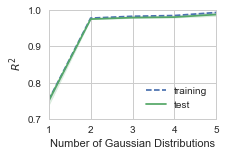

K_S


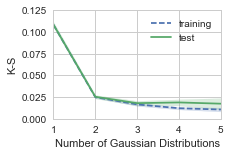

Chi_square


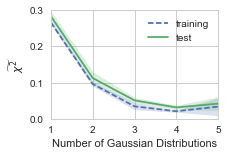

In [82]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

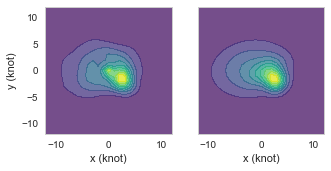

In [83]:
# fig = plt.figure(figsize=(4.3,2.4))
fig = plt.figure(figsize=(5,2.5))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='x'+speed_unit_text, ylabel='', colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

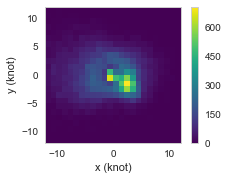

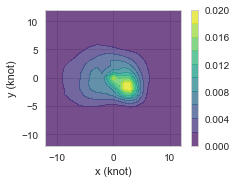

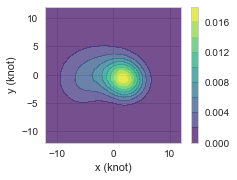

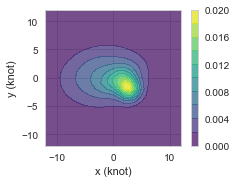

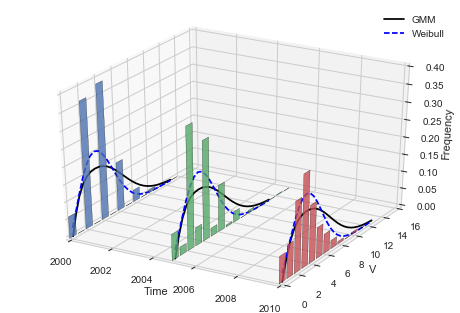

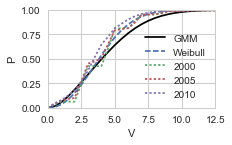

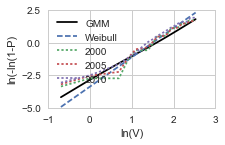

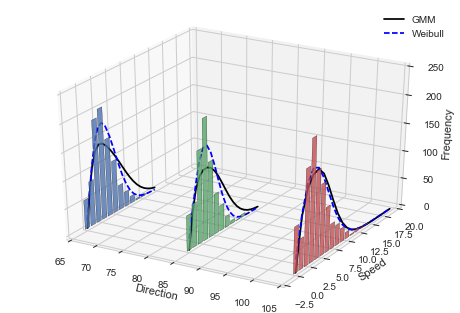

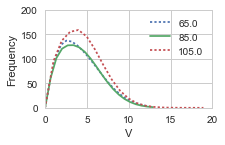

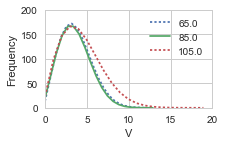

In [84]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [85]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)

pau_pyrenees
